In [1]:
"""
Politecnico di Torino - Laurea Triennale Ingegneria Energetica
Corso Energetica e Fonti Rinnovabili - Esercitazione Radiazione Solare e Fotovoltaico
"""
__author__ = "Daniele Salvatore Schiera"
__version__ = "Rev. 17/03/2025"
__email__ = "daniele.schiera@polito.it"

# Imports
interactive = True
if interactive:
# for interactivity:
    %matplotlib widget 
else:
# for printing pdf:
    %matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime
from pvlib import solarposition, location
from pvlib.iotools import pvgis
from IPython.display import Markdown, Image, display, HTML, Latex, IFrame
import ipywidgets as wds
#plt.style.use('seaborn-whitegrid')

In [2]:
# Set-up esercizi

# Località
# Torino
L = 45.12 # Lat [°]
l_local = -7.74 # Long [°]
l_st = -15 # long standard [°]

# Data
anno = 2025
mese = 3
giorno = 19
ora = '13:00'
col = 0 # 1 se ora legale, altrimenti 0.
ol_string = 'non è attiva l’ora legale' if col == 0 else 'è attiva l’ora legale'

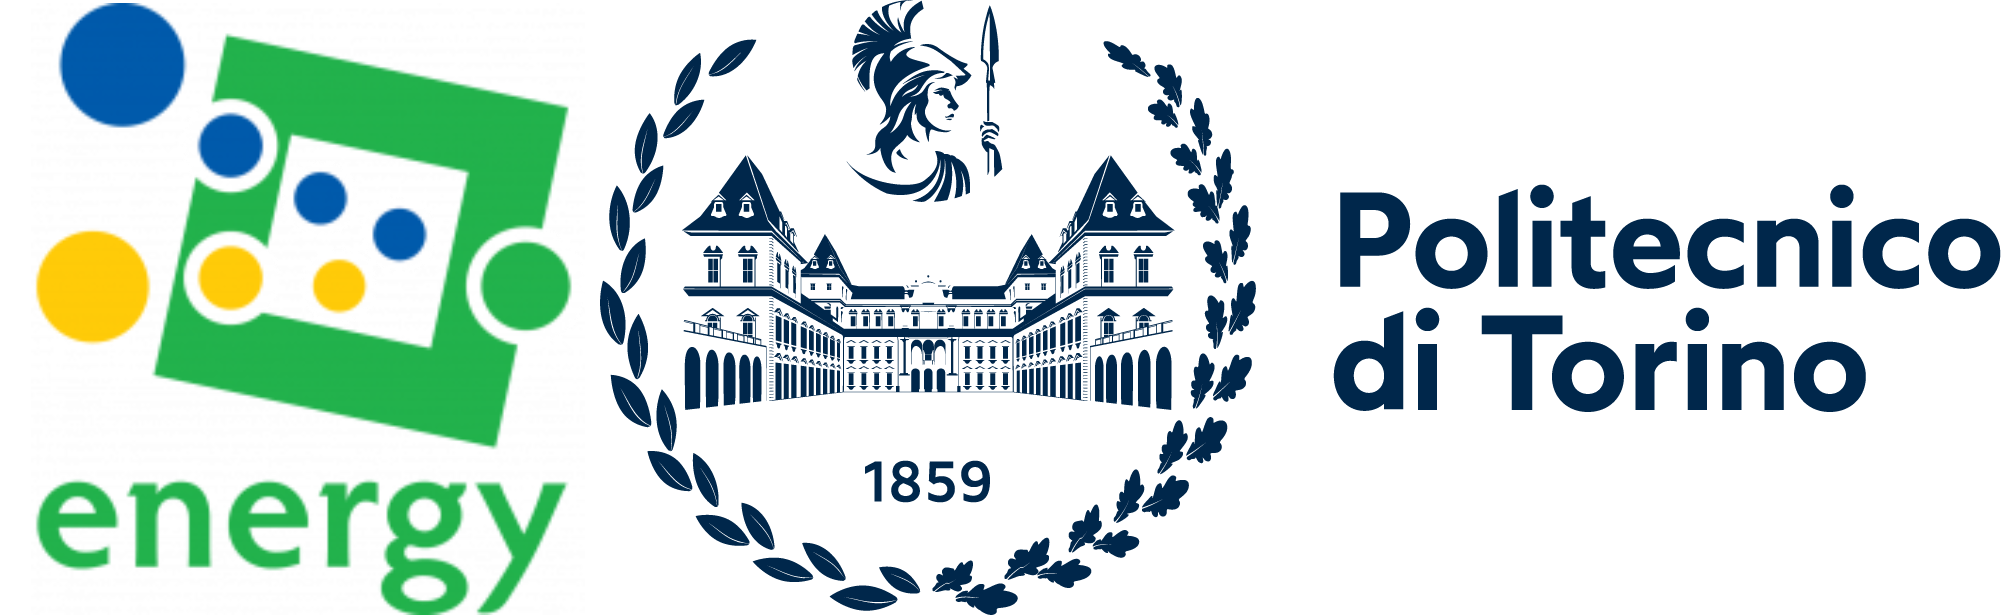

In [3]:
Image(filename="img/DENERG-Polito_Logo.png", width=400)

## Energetica e Fonti Rinnovabili {-}
### DENERG - Politecnico di Torino {-}
#### Daniele Salvatore Schiera, PhD {-}
##### daniele.schiera@polito.it {-}


----

# Esercitazione - Radiazione Solare e Fotovoltaico

## Obiettivi di apprendimento
- Calcolare la radiazione solare incidente su una superficie inclinata arbitraria e le sue componenti (diretta, diffusa, riflessa) noti gli angoli solari fondamentali e l’inclinazione e orientazione della superficie. Utilizzare il modello REST2 (ASHRAE clear sky) per il calcolo della radiazione diretta e diffusa su una superficie orizzontale.
- Calcolare la radiazione solare giornaliera media mensile su una superficie inclinata utilizzando il modello di Collares-Pereira e Rabl (CPR).
- Calcolo della Potenza Effettiva impianto fotovoltaico utilizzando la definizione di efficienza relativa.
- Laboratorio utilizzo PVGIS e Libreria Python pvlib

## Esercizi

In [4]:
Markdown(fr'1. Per una superficie inclinata di $30$ gradi rispetto al piano orizzontale e orientata di $10$ gradi a ovest (i.e., angolo azimutale $a_w$) collocata a Torino (Latitudine $L \ {L}^\circ$, longitudine $l \ {l_local}^\circ$, $l_{{st}} \ {l_st}^\circ$), calcolare la radiazione solare totale incidente e le sue componenti per il giorno  **{giorno:02d}/{mese:02d}/{anno} alle ore {ora}** (nota: {ol_string}) ipotizzando un coefficiente di riflessione del terreno pari a $0.2$. Per il calcolo della radiazione diretta e diffusa su piano orizzontale utilizzare il metodo REST2 (dati per Torino riportati in tabella, valori per il 21° giorno del mese). Nota: considerare una costante solare pari a $1366.1 \ W/m^2$. Confrontare il risultato ottenuto con il tool online PVGIS.')

1. Per una superficie inclinata di $30$ gradi rispetto al piano orizzontale e orientata di $10$ gradi a ovest (i.e., angolo azimutale $a_w$) collocata a Torino (Latitudine $L \ 45.12^\circ$, longitudine $l \ -7.74^\circ$, $l_{st} \ -15^\circ$), calcolare la radiazione solare totale incidente e le sue componenti per il giorno  **19/03/2025 alle ore 13:00** (nota: non è attiva l’ora legale) ipotizzando un coefficiente di riflessione del terreno pari a $0.2$. Per il calcolo della radiazione diretta e diffusa su piano orizzontale utilizzare il metodo REST2 (dati per Torino riportati in tabella, valori per il 21° giorno del mese). Nota: considerare una costante solare pari a $1366.1 \ W/m^2$. Confrontare il risultato ottenuto con il tool online PVGIS.

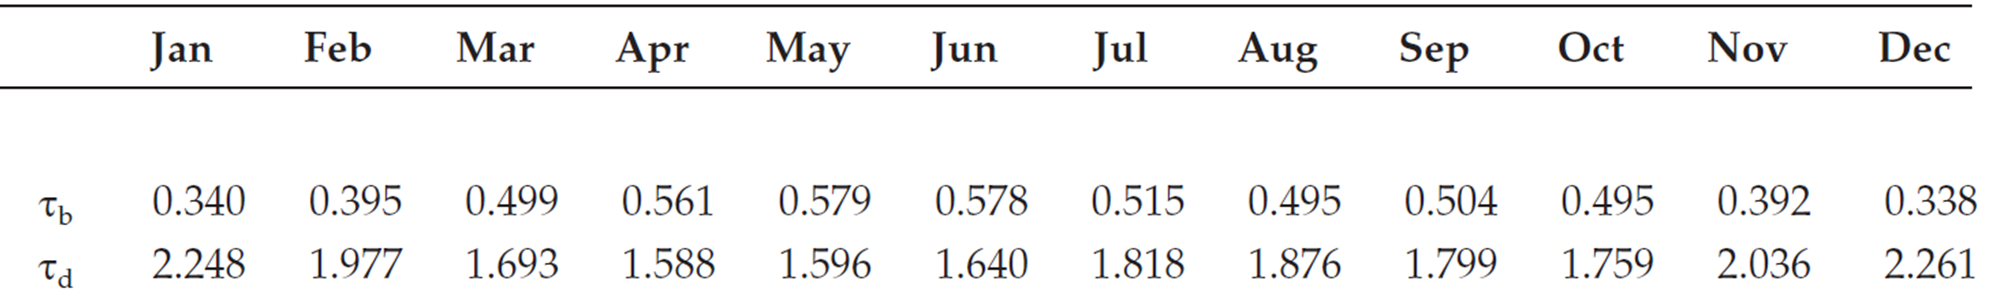

In [5]:
Image(filename="img/param_REST2.png",width=800)

In [6]:
Markdown(fr'2. Per una superficie inclinata di $25$ gradi rispetto al piano orizzontale e orientata a sud, localizzata a Torino (Latitudine $L \ {L}^\circ$, longitudine $l \ {l_local}^\circ$, $l_{{st}} \ {l_st}^\circ$), vengono forniti per il mese di Aprile il valore *misurato* della media mensile della radiazione terrestre giornaliera ($\overline{{H_h}}$) ed il valore *calcolato* della corrispondente radiazione extraterrestre ($\overline{{H_{{o,h}}}}$), che valgono rispettivamente $4008  \ Wh/m^2/day$ e $9211 \ Wh/ m^2/day$. Utilizzando il metodo di Collares-Pereira e Rabl (CPR), calcolare il valore medio mensile della radiazione totale giornaliera incidente sulla superficie inclinata per il **{giorno:02d}/{mese:02d}/{anno}**.  Nota: per il terreno considerare un coefficiente di riflessione pari a $0.2$.')

2. Per una superficie inclinata di $25$ gradi rispetto al piano orizzontale e orientata a sud, localizzata a Torino (Latitudine $L \ 45.12^\circ$, longitudine $l \ -7.74^\circ$, $l_{st} \ -15^\circ$), vengono forniti per il mese di Aprile il valore *misurato* della media mensile della radiazione terrestre giornaliera ($\overline{H_h}$) ed il valore *calcolato* della corrispondente radiazione extraterrestre ($\overline{H_{o,h}}$), che valgono rispettivamente $4008  \ Wh/m^2/day$ e $9211 \ Wh/ m^2/day$. Utilizzando il metodo di Collares-Pereira e Rabl (CPR), calcolare il valore medio mensile della radiazione totale giornaliera incidente sulla superficie inclinata per il **19/03/2025**.  Nota: per il terreno considerare un coefficiente di riflessione pari a $0.2$.

3. Si considera un impianto fotovoltaico di tipo **c-Si** da $1 \ kW_p$. Calcolare la potenza elettrica effettiva alle condizioni di irradiazione e posizione dell'*Esercizio 1*, considerando una temperatura ambiente di $15 \ °C$ con un vento alla velocità di $1.4 m/s$.

4. Laboratorio utilizzo PVGIS e Libreria Python pvlib

In [7]:
Latex(r"\newpage")

<IPython.core.display.Latex object>

# Esercizio 1

In [8]:
Markdown(fr'Per una superficie inclinata di $30$ gradi rispetto al piano orizzontale e orientata di $10$ gradi a ovest (i.e., angolo azimutale $a_w$) collocata a Torino (Latitudine $L \ {L}^\circ$, longitudine $l \ {l_local}^\circ$, $l_{{st}} \ {l_st}^\circ$), calcolare la radiazione solare totale incidente e le sue componenti per il giorno  **{giorno:02d}/{mese:02d}/{anno} alle ore {ora}** (nota: {ol_string}) ipotizzando un coefficiente di riflessione del terreno pari a $0.2$. Per il calcolo della radiazione diretta e diffusa su piano orizzontale utilizzare il metodo REST2 (dati per Torino riportati in tabella, valori per il 21° giorno del mese). Nota: considerare una costante solare pari a $1366.1 \ W/m^2$. Confrontare il risultato ottenuto con il tool online PVGIS.')

Per una superficie inclinata di $30$ gradi rispetto al piano orizzontale e orientata di $10$ gradi a ovest (i.e., angolo azimutale $a_w$) collocata a Torino (Latitudine $L \ 45.12^\circ$, longitudine $l \ -7.74^\circ$, $l_{st} \ -15^\circ$), calcolare la radiazione solare totale incidente e le sue componenti per il giorno  **19/03/2025 alle ore 13:00** (nota: non è attiva l’ora legale) ipotizzando un coefficiente di riflessione del terreno pari a $0.2$. Per il calcolo della radiazione diretta e diffusa su piano orizzontale utilizzare il metodo REST2 (dati per Torino riportati in tabella, valori per il 21° giorno del mese). Nota: considerare una costante solare pari a $1366.1 \ W/m^2$. Confrontare il risultato ottenuto con il tool online PVGIS.

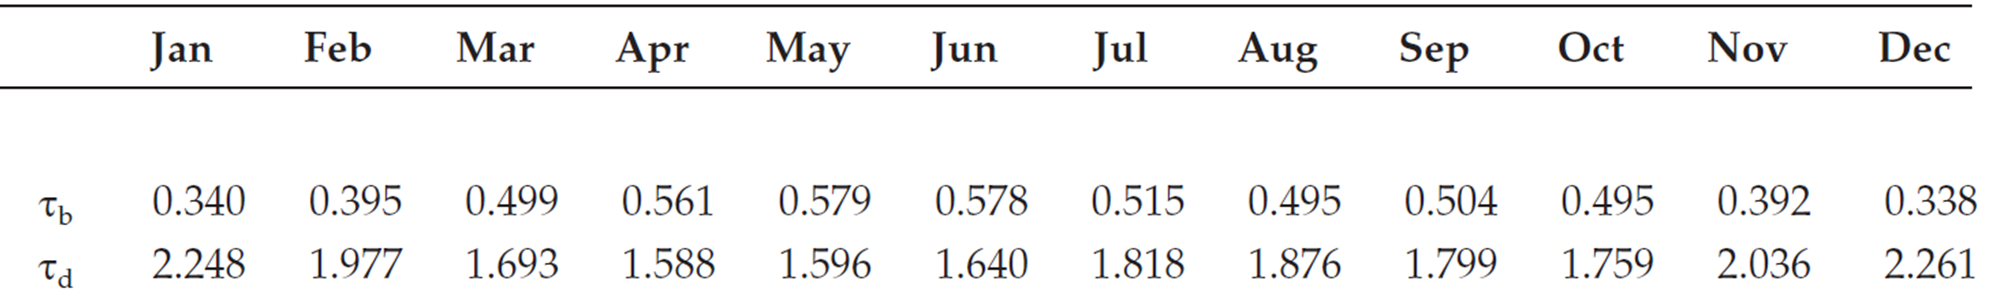

In [9]:
Image(filename="img/param_REST2.png", width=800)

## Dati:

In [10]:
# Dati input
# L = 45 # Lat [°]
# l_local = -7.68 # Long [°]
# l_st = -15 # long standard [°]
# anno = 2024
# mese = 3
# giorno = 27
data = pd.to_datetime(f'{anno}-{mese:02d}-{giorno:02d} 13:00')
col = 0 # 1 se ora legale, altrimenti 0. 
ora = data.hour+data.minute/60 # [h] in ore decimali
a_w = 10 # angolo azimutale del collettore [°]. + positivo se verso ovest
beta = 30 # tilt del collettore [°]
I_0 = 1366.1 # [W/m2]
rho = 0.2 # coefficiente di riflessione terreno

# In base al mese in esame inserire i tau corretti nel range del giorno tra i due mesi (validi al 21° giorno del mese)
def get_tau(month, day):
    data = {
        1: {"τ_b": 0.340, "τ_d": 2.248},
        2: {"τ_b": 0.395, "τ_d": 1.977},
        3: {"τ_b": 0.499, "τ_d": 1.693},
        4: {"τ_b": 0.561, "τ_d": 1.588},
        5: {"τ_b": 0.579, "τ_d": 1.596},
        6: {"τ_b": 0.578, "τ_d": 1.640},
        7: {"τ_b": 0.515, "τ_d": 1.818},
        8: {"τ_b": 0.495, "τ_d": 1.876},
        9: {"τ_b": 0.504, "τ_d": 1.799},
        10: {"τ_b": 0.495, "τ_d": 1.759},
        11: {"τ_b": 0.392, "τ_d": 2.036},
        12: {"τ_b": 0.338, "τ_d": 2.261},
    }

    # Se il giorno è maggiore di 21, passa al mese successivo
    if day > 21:
        month_max = month + 1 if month < 12 else 1  # Passa al mese successivo, con Dicembre -> Gennaio
        month_min = month
    else:
        month_max = month
        month_min = month - 1 if month > 1 else 12

    tau_values_min = data[month_min]
    tau_values_max = data[month_max]
    
    tau_b_min, tau_b_max = tau_values_min["τ_b"], tau_values_max["τ_b"]
    tau_d_min, tau_d_max = tau_values_min["τ_d"], tau_values_max["τ_d"]
    return tau_b_min, tau_b_max, tau_d_min, tau_d_max, month_max, month_min

tau_b_min, tau_b_max, tau_d_min, tau_d_max, month_max, month_min = get_tau(mese,giorno)

# Dati calcolati
n_min = pd.to_datetime(f'{anno}-{month_min:02d}-21 13:00').dayofyear
n_max = pd.to_datetime(f'{anno}-{month_max:02d}-21 13:00').dayofyear
n = data.dayofyear # Numero identificativo del giorno in esame rispetto l'anno 

# Output
Markdown(fr'$L = {L}^{{\circ}};\ l_{{local}} = {l_local}^{{\circ}};\ l_{{st}} = {l_st}^{{\circ}};\ ora \ orologio = {ora} \ h;\  n = {n};\  a_w = {a_w}^{{\circ}};\  \\beta = {beta}^{{\circ}}; \ I_o = {I_0} \ W/m^2$.')

$L = 45.12^{\circ};\ l_{local} = -7.74^{\circ};\ l_{st} = -15^{\circ};\ ora \ orologio = 13.0 \ h;\  n = 78;\  a_w = 10^{\circ};\  \\beta = 30^{\circ}; \ I_o = 1366.1 \ W/m^2$.

## Procedimento

Per calcolare la radiazione incidente al collettore, dobbiamo identificare gli angoli di azimut solare $a_s$ ed altitudine solare $\alpha$ attraverso il calcolo degli angoli solari fondamentali (latitudine $L$, declinazione solare $\delta_s$ e angolo orario solare $h_s$).

>**NOTA:** Per approfondire gli angoli solari ed il calcolo della posizione del sole sulla volta celeste rispetto all'osservatore, si rimanda all'*Esercitazione - Angoli Solari*.

La **latitudine** $L$ é un dato di input.

La **declinazione** $\delta_s$ può essere calcolata in funzione del giorno dell'anno $n$, secondo l'equazione:
$$\delta_s = 23.45^{{\circ}}\sin\left( \frac{360(284+n)}{365^{{\circ}}} \right) \quad [^{{\circ}}]$$

In [11]:
declination = solarposition.declination_cooper69(n) * 180 / np.pi # gradi, stessa formula usata a lezione
Markdown(fr'Al giorno $n={n}$ la declinazione solare risulta $\delta_s={round(declination,3)}^{{\circ}}$.')

Al giorno $n=78$ la declinazione solare risulta $\delta_s=-1.21^{\circ}$.

Per il calcolo dell'**angolo orario** $h_s$ è necessario prima conoscere l'**ora solare** $ST$:
$$\begin{align*}
ST &= LST + ET + (l_{st}-l_{local})\cdot4 \quad [min] \quad (1) \\
\text{dove:} \\
LST &\ \text{ora standard locale civile} \quad [min] \\
ET &= 9.87\sin 2B -7.53\cos B -1.5\sin B  \quad [min] \\
B &= \frac{360(n-81)}{364} \quad [^{{\circ}}]
\end{align*}$$

Svolgendo i calcoli per le singole componenti dell'equazine (1) otteniamo:

In [12]:
LST = (ora - col)*60
Markdown(fr'$LST = ora - {col} = {ora-col} \ h = {round(LST,2)} \ min$.')

$LST = ora - 0 = 13.0 \ h = 780.0 \ min$.

In [13]:
# ET for n
B = 360*(n-81)/364
B_rad = B*np.pi/180
ET = 9.87*np.sin(2*B_rad)-7.53*np.cos(B_rad)-1.5*np.sin(B_rad)
Markdown(fr'$B = {round(B,3)}^{{\circ}}={round(B_rad,5)} \ rad \implies  ET = {round(ET,2)} \ min$.')

$B = -2.967^{\circ}=-0.05178 \ rad \implies  ET = -8.46 \ min$.

In [14]:
corr_long = (l_st - l_local)*4
Markdown(fr'$(l_{{st}}-l_{{local}})\cdot4 = {round(corr_long,2)} \ min$.')

$(l_{st}-l_{local})\cdot4 = -29.04 \ min$.

Dunque, l'ora solare $ST$ risulta:

In [15]:
ST = LST + ET + corr_long # minuti
ST_h = ST/60 # ore decimali
ST_hour = math.modf(ST_h)[1]
ST_min = np.round(math.modf(ST_h)[0]*60)
diff = LST - ST
diff_h = diff/60
diff_hour = math.modf(diff_h)[1]
diff_min = np.round(math.modf(diff_h)[0]*60) #np.ceil((diff_h-diff_hour)*60)
Markdown(fr'$ST = {round(ST,2)} \min$ => ${round(ST/60,2)} \ h$ => ${int(ST_hour):02d}{{:}}{int(ST_min):02d}$. Dai risultati, si può notare come l\'ora locale $LST$ differisce dall\'ora solare $ST$ di ben ${round(diff_hour*60+diff_min,2)} \min$.')

$ST = 742.5 \min$ => $12.37 \ h$ => $12{:}22$. Dai risultati, si può notare come l\'ora locale $LST$ differisce dall\'ora solare $ST$ di ben $38.0 \min$.

L'**angolo orario** $h_s$ possiamo adesso calcolarlo con la seguente equazione:
$$h_s = 15[^{{\circ}}/h]\cdot(ST[h]-12)=\frac{ST[min]-12\cdot60}{4[min/^{{\circ}}]} \quad [^{{\circ}}]$$

In [16]:
h_s = (ST_h-12)*15 # gradi
Markdown(fr'Dunque risulta un angolo orario solare $h_s = {round(h_s,2)}^{{\circ}}$, positivo e dunque nel pomeriggio dopo il mezzogiorno vero.')        

Dunque risulta un angolo orario solare $h_s = 5.62^{\circ}$, positivo e dunque nel pomeriggio dopo il mezzogiorno vero.

Una volta calcolati gli angoli solare fondamentali si procede al calcolo di **altitudine solare** $\alpha$ e **azimut solare** $a_s$ attraverso le seguenti relazioni trigonometriche:
$$\begin{align*}
\sin \alpha &=\sin L \sin \delta_s + \cos L \cos \delta_s \cos h_s \\
\sin a_s  &= \frac{\cos \delta_s \sin h_s}{\cos \alpha} \quad \text{valida solo se} \ |a_s|<90^\circ\text{:}\\
 &\text{Se} \ |L|>|\delta_s| \ \text{verifica:} \ |h_s|< h_{s,ew} = \cos^{-1}\left(\cot L \tan \delta_s \right) \implies |a_s|<90^\circ \\
 &\text{Altrimenti se} \ |L|\leq|\delta_s| \ \text{utilizzare formula corretta per il calcolo di} \ a_s
\end{align*}$$

In [17]:
alpha = np.arcsin(np.sin(np.radians(L))*np.sin(np.radians(declination))+np.cos(np.radians(L))*np.cos(np.radians(declination))*np.cos(np.radians(h_s))) # radianti
Markdown(fr'Risolvendo si ottiene $\alpha = {round(alpha,4)}\ rad={round(alpha*180/np.pi,2)}^{{\circ}}$.')

Risolvendo si ottiene $\alpha = 0.7575\ rad=43.4^{\circ}$.

In [18]:
h_sew = np.arccos(np.tan(np.radians(declination))/np.tan(np.radians(L)))*180/np.pi
h_sew = 1000 if np.isnan(h_sew) else h_sew
h_sew_text = 'M' if h_sew == 1000 else round(h_sew,2)
a_s0 = np.arcsin(np.cos(np.radians(declination))*np.sin(np.radians(h_s))/np.cos(alpha))
sigma_ew = 1 if np.abs(h_s)<h_sew else -1
sigma_ns = 1 if L>declination else -1
# sigma_ns = 1 if L*(L-declination)>=0 else -1 
sigma_w = 1 if h_s>=0 else -1
a_s = sigma_ew*sigma_ns*a_s0*180/np.pi+((1-sigma_ew*sigma_ns)/2)*sigma_w*180 # gradi

Markdown(fr'$h_s = {round(h_s,2)}^{{\circ}}; \ h_{{s,ew}} = {h_sew_text}^{{\circ}}$ e dunque $a_s = {round(a_s,2)}^{{\circ}}$')  

$h_s = 5.62^{\circ}; \ h_{s,ew} = 91.21^{\circ}$ e dunque $a_s = 7.75^{\circ}$

Nel seguente diagramma si evidenzia la posizione del sole nel giorno e nell'ora considerata, con l'indicazione dell'ora di alba e tramonto. 

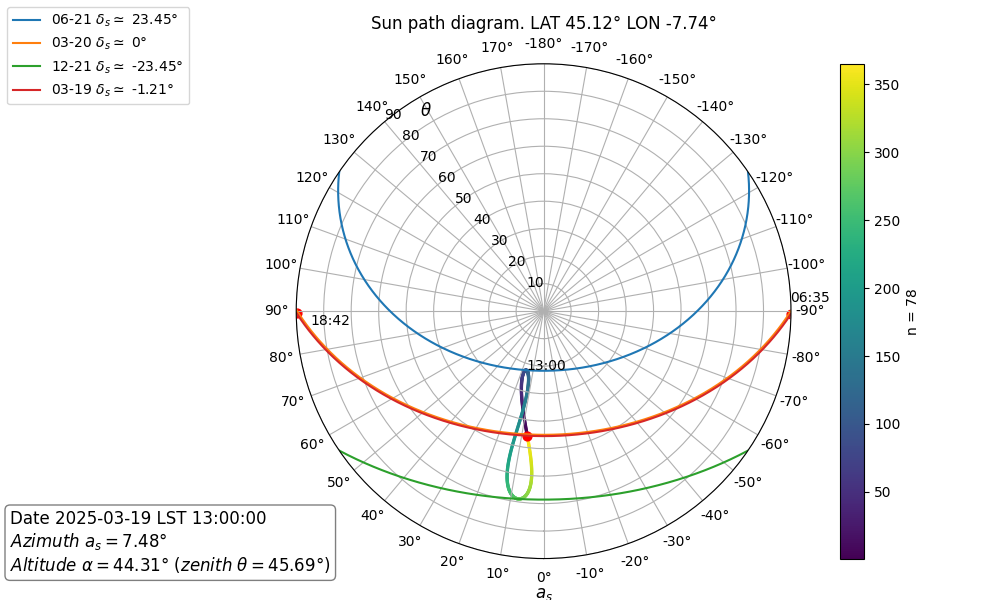

In [19]:
# Posizione sole nel caso studio
time = data-pd.Timedelta(hours=col) # per correggere ora legale

ETl = pd.to_timedelta(np.array(solarposition.equation_of_time_pvcdrom(n)), unit='minutes')
solar_timel = time + ETl + pd.Timedelta(minutes=(l_st - l_local) * 4) # da verificare UTC

pos = solarposition.get_solarposition(time, L, l_local, method='ephemeris')

azimuthl = pos.azimuth.iloc[0]
zenithl = pos.zenith.iloc[0]

fig2 = plt.figure(figsize=(10,6))
fig2.canvas.header_visible = False
ax2 = plt.subplot(1, 1, 1, projection='polar')
# cambio del riferimento della coordinata theta per il grafico
corr = -180
# Analemma per l'ora in esame 
times = pd.date_range(time,time +pd.Timedelta(days=364),freq='D', tz='UTC')
solpos = solarposition.get_solarposition(times, L, l_local, method='ephemeris')  # lo converte in UTC
# remove nighttime
solpos = solpos.loc[solpos['elevation'] > 0, :]
points = ax2.scatter(np.radians(solpos.azimuth + corr), solpos.zenith, s=2, label=None,c=np.unique(solpos.index.dayofyear))
ax2.figure.colorbar(points, label = f'n = {n}')
# Posizione sole
ax2.scatter(np.radians(pos.azimuth + corr),pos.zenith, s=40, label=None, c='red')
# Ora posizione
r = solpos.zenith
postext = solpos.loc[r.idxmin(), :]
ax2.text(np.radians(postext['azimuth'] + corr), postext['zenith'], time.strftime('%H:%M'))
# Disengno sun path particolari (soltizi ed equinozi)
color = {'2020-06-21':'tab:blue', '2020-03-20':'tab:orange', '2020-12-21':'tab:green',time.strftime('%Y-%m-%d'):'tab:red'}
days = {'2020-06-21':23.45, '2020-03-20':0, '2020-12-21':-23.45,time.strftime('%Y-%m-%d'):round(declination,2)}
for date in pd.to_datetime(list(days.keys())):
    times = pd.date_range(date, date + pd.Timedelta('24h'), freq='1min', tz='UTC')
    solpos = solarposition.get_solarposition(times, L, l_local)
    solpos = solpos.loc[solpos['elevation'] >= 0, :]
    label = date.strftime('%m-%d')
    d = date.strftime('%Y-%m-%d')
    ax2.plot(np.radians(solpos.azimuth + corr), solpos.zenith, label=label+rf' $\delta_s \simeq$ {days[d]}°',c=color[d])

sun_rise_set_transit = solarposition.sun_rise_set_transit_ephem(times,L,l_local).iloc[0]
sunrise = sun_rise_set_transit['sunrise']
sunset = sun_rise_set_transit['sunset']

postext = solpos.iloc[0]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['zenith'], sunrise.strftime('%H:%M'))
ax2.scatter(np.radians(postext.azimuth + corr),postext.zenith, s=40, label=None, c='red')
postext = solpos.iloc[-1]
ax2.text(np.radians(postext['azimuth'] + corr)-0.05, postext['zenith']-5, sunset.strftime('%H:%M'))
ax2.scatter(np.radians(postext.azimuth + corr),postext.zenith, s=40, label=None, c='red')
ax2.figure.legend(loc='upper left')

textstr = '\n'.join((f'Date {time.date()} LST {time.time()}',
    r'$Azimuth \ a_s=%.2f °$' % (-180+azimuthl, ),
    r'$Altitude \ \alpha=%.2f ° \ (zenith \ \theta=%.2f °)$' % (90-zenithl,zenithl, )))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax2.figure.text(0.01, 0.15, textstr, fontsize=12,
        verticalalignment='top', bbox=props)

ax2.set_title(f'Sun path diagram. LAT {L}° LON {l_local}°')
# cambio coordinate
theta_labels = list(np.linspace(0,180,18,endpoint=False,dtype='int'))+list(np.linspace(-180,0,18,endpoint=False,dtype='int'))
theta_labels = [f'{str(elem)}°' for elem in theta_labels]
ax2.set_theta_zero_location('S')
ax2.set_theta_direction(-1)
ax2.set_rmax(90)
ax2.set_rlabel_position(140)
ax2.set_thetagrids(np.linspace(0,360,36, endpoint=False),labels=theta_labels)
ax2.figure.text(0.535, 0.025, '$a_s$', fontsize=12,
        verticalalignment='top')
ax2.figure.text(0.42, 0.83, r'$\theta$', fontsize=12,
        verticalalignment='top')
fig2.tight_layout()

Infine, è necessario determinare l'**angolo di incidenza** $i$ della radiazione solare sulla superficie che ha una certa inclinazione $\beta$ rispetto al piano orizzontale e un angolo azimutale $a_w$ rispetto al Sud. l'angolo di incidenza $i$ si calcola dalla seguente relazione trigonometrica, in funzione degli angoli che descrivono la posizione del piano inclinato (sopracitati) e la posizione del sole rispetto l'osservatore (azimuth solare $a_s$ e altitudine solare $\alpha$):
$$\cos i = \cos \alpha \cos(a_s-a_w)\sin \beta + \sin \alpha \cos \beta$$

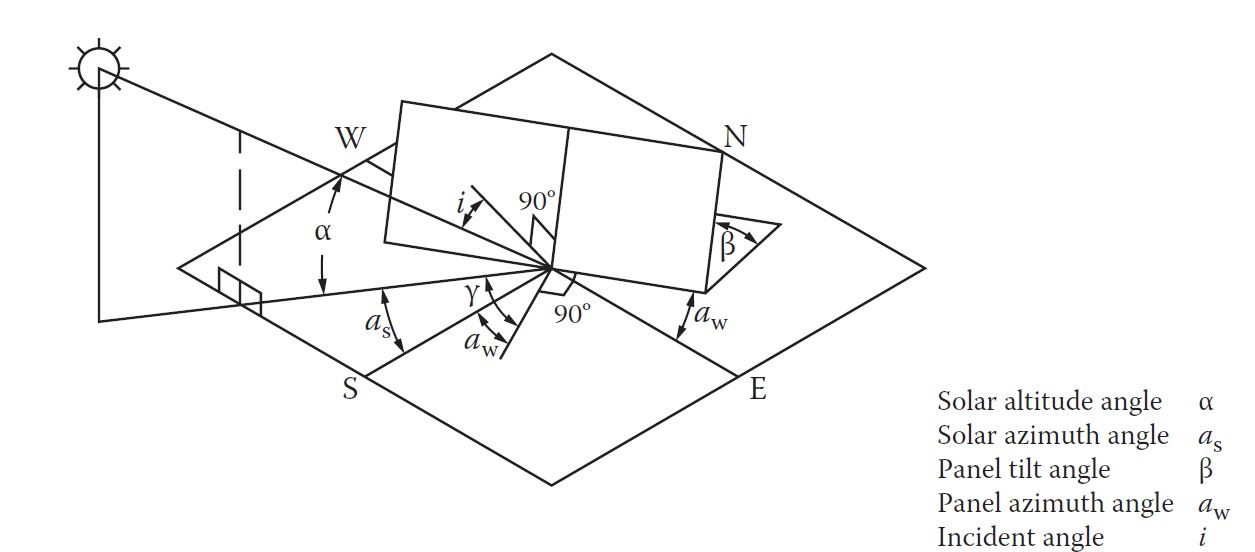

In [20]:
Image(filename="img/rad_incidente_collettore.JPG", width=800)

>**Nota**: in alternativa, l'angolo di incidenza $i$ può essere espresso in funzione degli angoli solari fondamentali, cioè gli angoli sole-terra (latitudine $L$, declinazione solare $\delta_s$ e angolo orario solare $h_s$), oltre agli angoli descrittivi del piano inclinato:
$$\begin{align} \cos i &= \sin \delta_s (\sin L \cos \beta - \cos L \sin \beta \cos a_w)\\
\quad \quad \quad \quad &+ \cos \delta_s \cos h_s (\cos L \cos \beta + \sin L \sin \beta \cos a_w) \\
\quad &+ \cos \delta_s \sin \beta \sin a_w \sin h_s \end{align}$$
Se la superficie del collettore è orientata verso sud ($a_w = 0^\circ$) l'equazione diventa:
$$ \cos i = \sin(L-\beta)\sin \delta_s + \cos(L-\beta)\cos \delta_s \cos h_s$$
Si può notare come questa equazione sia molto simile all'equazione per il calcolo dell'altitudine solare $\alpha$. Infatti, risulta che una superficie orientata a sud avrà una latitudine *effettiva* di $(L-\beta)$. A tal fine, similmente a quanto fatto con una superficie sul piano orizzontale, potremmo calcolare l'angolo orario di alba e tramonto *apparente* per la superficie inclinata ($h_{sr,t}$, $h_{ss,t}$) imponendo $i=90^\circ$ nell'equazione precedente:
$$i=90^\circ \implies h_{ss,t} \ \text{or} \ h_{sr,t} = \pm \cos^{-1}\left [ -\tan( L -\beta) \tan \delta_s \right] \quad [rad]$$
Tuttavia, poichè l'angolo orario di alba o tramonto della superficie inclinata non può assumere valori maggiori (in valore assoluto) dell'angolo orario di alba o tramonto *veri* ($h_{sr}$, $h_{ss}$), si definisce l'angolo orario di alba o tramonto *apparente* per una superficie inclinata come segue:
$$h_{ss,t} \ \text{or} \ h_{sr,t} = \pm \min\{h_{ss}, \cos^{-1}\left [ -\tan( L -\beta) \tan \delta_s \right]\}$$

In [21]:
i = np.arccos(np.cos(alpha)*np.cos(np.radians(a_s-a_w))*np.sin(np.radians(beta))+np.sin(alpha)*np.cos(np.radians(beta)))
Markdown(fr'Effettuando i calcoli risulta $i = {round(i*180/np.pi,2)}^\circ$.')

Effettuando i calcoli risulta $i = 16.65^\circ$.

> [Qui](https://www.geogebra.org/classic/ykvheubn) trovate una visualizzazione interattiva del piano inclinato e l\'angolo di incidenza con i raggi diretti del sole.


In [83]:
if interactive:
    display(IFrame(src="https://www.geogebra.org/classic/ykvheubn?embed", width=1500, height=600))
else:
    pass

In [23]:
# Equivalenza espressione i per angoli fondamentali e angoli osservatore sole (con a_w=0)
i_prova = np.arccos(np.cos(alpha)*np.cos(np.radians(a_s))*np.sin(np.radians(beta))+np.sin(alpha)*np.cos(np.radians(beta)))
i_angoli = np.arccos(np.sin(np.radians(L-beta))*np.sin(np.radians(declination))+np.cos(np.radians(L-beta))*np.cos(np.radians(declination))*np.cos(np.radians(h_s)))

Per il calcolo della radiazione totale $I_c$ incidente sul collettore e delle sue componenti (diretta $I_{b,c}$, diffusa $I_{d,c}$ e riflessa $I_{r,c}$), si procede all'applicazione di un modello di transposizione delle componenti note (generalmente la radiazione globale $I_{h}$, aka GHI, e la diffusa $I_{d,h}$, aka DHI, sul piano orizzontale sono misurate) sul piano inclinato:
$$\begin{align*}
I_c &= I_{b,c} + I_{d,c} + I_{r,c} \quad [W/m^2]\\
\text{dove:}\\
I_{b,c} &= I_{b,N}\cos i \quad [W/m^2]\\
I_{d,c} &= I_{d,h}\left (\frac{1+\cos \beta}{2}\right ) \quad [W/m^2]\\
I_{r,c} &= \rho I_{h}\left (\frac{1-\cos \beta}{2}\right ) \quad [W/m^2]\\
I_{h} &= I_{b,N}\sin \alpha + I_{d,h}
\end{align*}$$

>**Nota**: 1) $I_{b,h} = I_{b,N}\sin \alpha$. 2) Utilizzando le proprietà trigonometriche vale: $\frac{1+\cos \beta}{2}=\cos^2\left (\frac{\beta}{2}\right)$ e $\frac{1-\cos \beta}{2}=\sin^2\left (\frac{\beta}{2}\right)$. 2) Si utilizza un modello di transposizione isotropico, dove si assume che la radiazione diffusa è distribuita uniformemente sulla volta celeste (analogamente a quanto osservato in situazioni di cielo coperto). 3) Generalmente la GHI è misurata mentre la DHI potrebbe non essere disponibile, dunque si applicano dei modelli di decomposizione per calcolare la componente diffusa sul piano orizzontale.

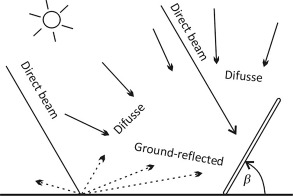

In [24]:
Image(filename="img/direct_diffuse_reflect.jpg", width=300)

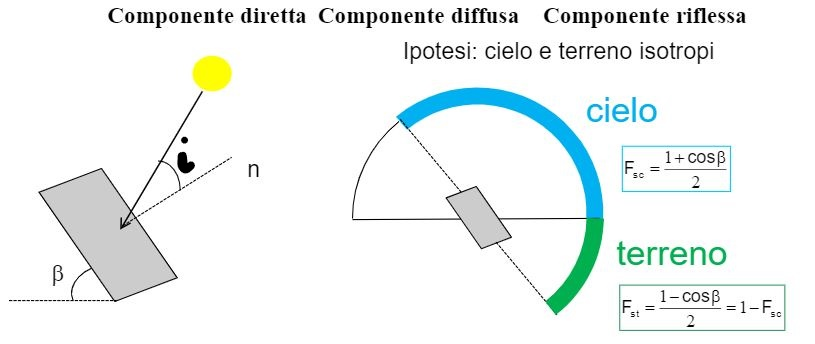

In [25]:
Image(filename="img/fattori_di_vista_mod.JPG", width=500)

Per il calcolo delle componenti utilizzeremo il modello REST2 (ASHRAE Clear-Sky) che attraverso un modello a parametri concentrati permette di calcolare la radiazione per unità di area (o **irradianza**) *diretta* su una superficie sempre *normale* ai raggi del sole $I_{b,N}$ e l' **irradianza** *diffusa* su una superficie *orizzontale*  $I_{d,h}$.
$$\begin{align*}
I_{b,N} &= Ie^{-\tau_b m^b} \quad [W/m^2]\\
I_{d,h} &= Ie^{-\tau_d m^d} \quad [W/m^2]\\
\text{dove:} \\
I & \ \text{radiazione normale extraterrestre}\\
m & \ \text{air mass} \\
\tau_b,\tau_d & \ \text{lunghezze ottiche diretta e diffusa}\\
b,d & \ \text{esponenti dell'air mass}
\end{align*}$$

La **radiazione normale extraterrestre** $I$ si calcola dalla seguente relazione empirica in funzione del giorno dell'anno $n$: 
$$\begin{align*}
I &= I_0 \left [1+0.034\cos \left ( \frac{360n}{365.25^\circ} \right )\right] \quad [W/m^2] \\
I_0 &= 1366.1 \ W/m^2
\end{align*}$$

In [26]:
I = I_0*(1+0.034*np.cos(np.radians(360*n/365.25)))
Markdown(fr'Svolgendo i calcoli si ottiene $I = {round(I,2)} \ W/m^2$.')

Svolgendo i calcoli si ottiene $I = 1376.64 \ W/m^2$.

L'indice di massa d'aria, o **air mass** $m$, tiene conto del percorso ottico diretto attraverso l'atmosfera terrestre. Nell'ipotesi di strato atmosferico a spessore costante, $m\simeq 1/\sin \alpha\simeq 1/\cos z$.

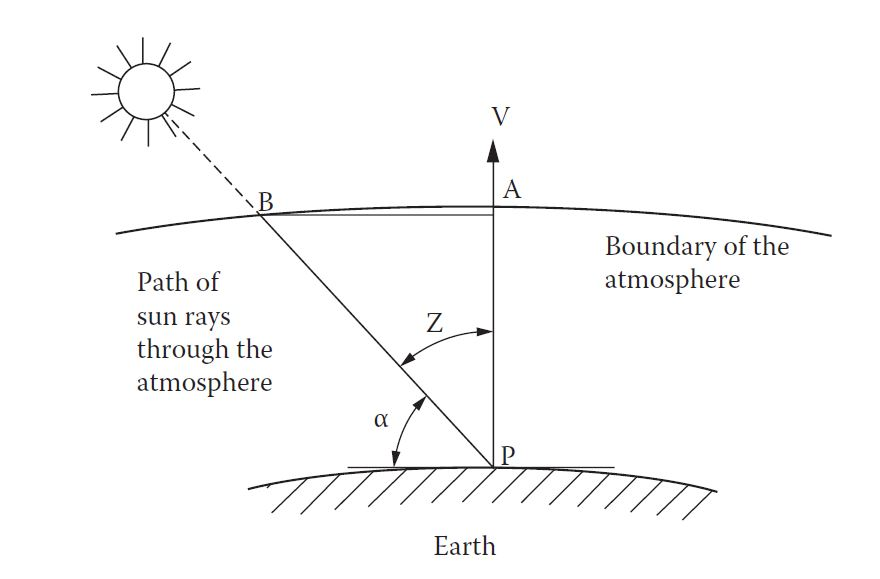

In [27]:
Image(filename="img/airmass.JPG", width=400)

Possiamo ottenere un'approssimazione più accurata di $m$ attraverso la seguente relazione:
$$m \simeq \frac{1}{\sin \alpha + 0.50572(6.07995+\alpha)^{-1.6364}}$$

>**Nota**: Nel secondo argomento del denominatore $\alpha$ è espresso in gradi.

In [28]:
m = 1/(np.sin(alpha)+0.50572*(6.07995+alpha*180/np.pi)**(-1.6364))
Markdown(f'Svolgendo i calcoli otteniamo $m = {round(m,5)}$.')

Svolgendo i calcoli otteniamo $m = 1.45358$.

Le **lunghezze ottiche** $\tau_b$ e $\tau_d$ si trovano tabulati e sono forniti con il testo dell'esercitazione. Da notare che i valori riportati in tabella sono validi per il 21° giorno del mese. Dunque per i giorni intermedi sarà necessario ricavarli per interpolazione lineare

In [29]:
tau_b = ((tau_b_max-tau_b_min)*(n-n_min)/(n_max-n_min))+tau_b_min
tau_d = ((tau_d_max-tau_d_min)*(n-n_min)/(n_max-n_min))+tau_d_min
Markdown(f'Estrapolando i dati dalla tabella (interpolando se necessario) otteniamo $\\tau_b = {round(tau_b,3)}$ e $\\tau_d = {round(tau_d,3)}$.')

Estrapolando i dati dalla tabella (interpolando se necessario) otteniamo $\tau_b = 0.492$ e $\tau_d = 1.713$.

Infine, gli **esponenti dell'air mass** $b$ e $d$ si calcolano attraverso le seguenti relazioni empiriche in funzione delle lunghezze ottiche:
$$\begin{align*}
b & = 1.219-0.043\tau_b-0.151\tau_d-0.204\tau_b \tau_d \\
d & = 0.202+0.852\tau_b-0.007\tau_d-0.357\tau_b \tau_d
\end{align*}$$

In [30]:
b = 1.219-0.043*tau_b-0.151*tau_d-0.204*tau_b*tau_d
d = 0.202+0.852*tau_b-0.007*tau_d-0.357*tau_b*tau_d
Markdown(f'Svolgendo i calcoli otteniamo $b={round(b,3)}$ e $d={round(d,3)}$.')

Svolgendo i calcoli otteniamo $b=0.767$ e $d=0.308$.

Avendo calcolato tutte i parametri del modello REST2 possiamo calcolare $I_{b,N}$ e $I_{d,h}$. Dunque otteniamo:

In [31]:
I_bN = I*np.exp(-tau_b*m**b)
I_dh = I*np.exp(-tau_d*m**d)
Markdown(fr'$I_{{b,N}}={round(I_bN,2)} \ W/m^2$ e $I_{{d,h}}={round(I_dh,2)} \ W/m^2$')

$I_{b,N}=715.09 \ W/m^2$ e $I_{d,h}=201.3 \ W/m^2$

A questo punto possiamo calcolare le 3 componenti che compongono la radiazione totale incidente al collettore:

In [32]:
I_bc = I_bN*np.cos(i)
I_dc = I_dh*((1+np.cos(np.radians(beta)))/2)
I_rc = rho*(I_bN*np.sin(alpha)+I_dh)*((1-np.cos(np.radians(beta)))/2)
I_c = I_bc+I_dc+I_rc
Markdown(fr'$I_{{b,c}}={round(I_bc,2)} \ W/m^2$; $I_{{d,c}}={round(I_dc,2)} \ W/m^2$; $I_{{r,c}}={round(I_rc,2)} \ W/m^2$.')

$I_{b,c}=685.09 \ W/m^2$; $I_{d,c}=187.82 \ W/m^2$; $I_{r,c}=9.28 \ W/m^2$.

In [33]:
Markdown(fr'Sommando le tre componenti si ottiene la **radiazione totale incidente sul piano inclinato** $I_{{c}}={round(I_c,2)} \ W/m^2$.')

Sommando le tre componenti si ottiene la **radiazione totale incidente sul piano inclinato** $I_{c}=882.19 \ W/m^2$.

Confrontare il risultato otteno con il modello REST2 (ASHRAE Clear-Sky) con la radiazione totale incidente sul piano inclinato calcolata attraverso l'utilizzo di dati satellitari (dunque dati *misurati*) con [PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/it/#MR). Nota: il modello di calcolo di PVGIS si basa sui dati satellitari stimando l'influenza delle nuvole sulla radiazione solare.

In [34]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

# Esercizio 2

In [84]:
Markdown(fr'Per una superficie inclinata di $25°$ rispetto al piano orizzontale e orientata a sud, localizzata a Torino (Latitudine $L \ {L}^\circ$, longitudine $l \ {l_local}^\circ$, $l_{{st}} \ {l_st}^\circ$), vengono forniti per il mese di **Marzo** il valore *misurato* della media mensile della radiazione terrestre giornaliera ($\overline{{H_h}}$) ed il valore *calcolato* della corrispondente radiazione extraterrestre ($\overline{{H_{{o,h}}}}$). Utilizzando il metodo di Collares-Pereira e Rabl (CPR), calcolare il valore medio mensile della radiazione totale giornaliera incidente sulla superficie inclinata per il **{giorno:02d}/{mese:02d}/{anno}**.  Nota: per il terreno considerare un coefficiente di riflessione pari a $0.2$.')

Per una superficie inclinata di $25°$ rispetto al piano orizzontale e orientata a sud, localizzata a Torino (Latitudine $L \ 45^\circ$, longitudine $l \ 7.74^\circ$, $l_{st} \ 15^\circ$), vengono forniti per il mese di **Marzo** il valore *misurato* della media mensile della radiazione terrestre giornaliera ($\overline{H_h}$) ed il valore *calcolato* della corrispondente radiazione extraterrestre ($\overline{H_{o,h}}$). Utilizzando il metodo di Collares-Pereira e Rabl (CPR), calcolare il valore medio mensile della radiazione totale giornaliera incidente sulla superficie inclinata per il **19/03/2025**.  Nota: per il terreno considerare un coefficiente di riflessione pari a $0.2$.

## Dati:

In [88]:
# Dati input
L = 45 # Lat [°]
l_local = -7.68 # Long [°]
l_st = -15 # long standard [°]
data = pd.to_datetime(f'{anno}-{mese:02d}-{giorno:02d}')
a_w = 0 # angolo azimutale del collettore [°]. positivo verso ovest
beta = 25 # tilt del collettore [°]
rho = 0.2 # coefficiente di riflessione terreno
H_h = 131.22*1000/data.days_in_month # SETTING valore calcolato da PVGIS sat SARAH3 Torino 2023. precendente valore senza fonte 3658.3 # [Wh/m2/day] 
H_0h = 6958 # [Wh/m2/day] per Marzo
# Dati ricavati
n = data.dayofyear # Numero identificativo del giorno in esame rispetto l'anno 
# Output
Markdown(fr'$L = {L}^{{\circ}};\ l_{{local}} = {l_local}^{{\circ}};\ l_{{st}} = {l_st}^{{\circ}};\ n = {n};\  a_w = {a_w}^{{\circ}};\  \\beta = {beta}^{{\circ}};\  \\\overline{{H_h}} = {round(H_h,0)}\ Wh/m^2/day;\  \\\overline{{H_{{0,h}}}} = {round(H_0h,0)}\ Wh/m^2/day$')

$L = 45^{\circ};\ l_{local} = -7.68^{\circ};\ l_{st} = -15^{\circ};\ n = 78;\  a_w = 0^{\circ};\  \\beta = 25^{\circ};\  \\\overline{H_h} = 4233.0\ Wh/m^2/day;\  \\\overline{H_{0,h}} = 6958\ Wh/m^2/day$

## Procedimento

I dati di radiazione solare misurati per lungo periodo sono generalmente disponibili come radiazione totale giornaliera media mensile ($Wh/m^2/day$) su superfici orizzontali $\overline{H_h}$. In questo caso, sono state utilizzate le misurazioni ricavate da [PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/it/#MR) (utilizzando il database satellitare PVGIS-SARAH3 con riferimento ai dati mensili e all'ultimo anno disponibile). Invece, la corrispondente radiazione extraterrestre $\overline{H_{o,h}}$ puo essere calcolata trovando $H_{o,h}= \int_{t_{sr}}^{t_{ss}}I \sin \alpha dt$ per ogni giorno del mese e calcolandone la media mensile. Per comodità i valori di $\overline{H_{o,h}}$ si trovano tabellati in funzione della latitudine di interesse (riportata in Appendice).
Per utilizzare questi dati su superfici inclinate, è necessario suddividere la radiazione solare totale su superficie orizzontale nelle componenti diretta e diffusa. Per fare ciò, sono stati sviluppati diversi modelli che permettono di calcolare il rapporto $\frac{\overline{D_h}}{\overline{H_h}}$. Tra questi, utilizzeremo il modello proposto da Collares-Pereira e Rabl (CPR).

Il modello di CPR definisce il rapporto $\frac{\overline{D_h}}{\overline{H_h}}$ in funzione dell'*angolo orario del tramonto* $h_{ss}$ ed il *clearness index* $\overline{K_T}$:
$$\begin{align*}
\frac{\overline{D_h}}{\overline{H_h}} &= 0.775+0.347\left (h_{ss}-\frac{\pi}{2} \right )- \left [0.505+0.0261\left (h_{ss}-\frac{\pi}{2} \right )\right ]\cos(2\overline{K_T}-1.8)\\
\text{dove:}\\
\overline{K_T} &= \frac{\overline{H_h}}{\overline{H_{o,h}}}\\
h_{ss} &= + \cos^{-1}(-\tan L \tan \delta_s) \quad [rad]
\end{align*}
$$

>**Nota**: i valori di radiazione giornaliera mediati sul mese ($Wh/m^2/day$) diffusa $\overline{D_h}$ e totale $\overline{H_h}$ sono del tutto analoghi alla radiazione istantanea (irradianza) ($W/m^2$) diffusa $I_{d,h}$ e totale $I_{h}$.

In [37]:
K_T = H_h/H_0h
declination = solarposition.declination_cooper69(n) * 180 / np.pi # gradi, stessa formula usata a lezione
h_ss = + np.arccos(-np.tan(np.radians(L))*np.tan(np.radians(declination)))
h_sr = -h_ss
D_h = H_h*(0.775+0.347*(h_ss-np.pi/2)-(0.505+0.0261*(h_ss-np.pi/2))*np.cos(2*K_T-1.8))
D_h_H_h = D_h/H_h
Markdown(fr'Svolgendo i calcoli risulta: $K_T = {round(K_T,3)}$; $h_{{ss}} = {round(h_ss*180/np.pi,2)}^\circ (h_{{sr}} = {round(h_sr*180/np.pi,2)}^\circ)$; $\overline{{D_h}}/\overline{{H_h}}={round(D_h_H_h,3)}$; $\overline{{D_h}} = {round(D_h,2)} \ Wh/m^2/day$.')

Svolgendo i calcoli risulta: $K_T = 0.608$; $h_{ss} = 88.79^\circ (h_{sr} = -88.79^\circ)$; $\overline{D_h}/\overline{H_h}=0.347$; $\overline{D_h} = 1467.25 \ Wh/m^2/day$.

Nota la componente diffusa $\overline{D_h}$ possiamo calcolare la componente diretta $\overline{B_h}$ per sottrazione dal totale $\overline{H_h}$:
$$\overline{B_h} = \overline{H_h}-\overline{D_h} \quad [Wh/m^2/day]$$

In [38]:
B_h = H_h-D_h
Markdown(fr'Dunque risulta $\overline{{B_h}}={round(B_h,2)} \ Wh/m^2/day$.')

Dunque risulta $\overline{B_h}=2765.65 \ Wh/m^2/day$.

Per il calcolo della radiazione totale giornaliera media mensile incidente su un piano inclinato è necessario calcolare le componenti diretta, diffusa e riflessa (in modo analogo a quanto fatto nel calcolo dell'irradianza - radiazione solare instantanea per unità di superficie - nell'Esercizio 1): 
$$\begin{align*}
\overline{H_c} &= \overline{B_c}+\overline{D_c}+ \overline{H_{r,c}} \quad [Wh/m^2/day]\\
\text{dove:}\\
\overline{B_c} &= \overline{R_b} \cdot \overline{B_h}\quad [Wh/m^2/day] \\
\overline{D_c} &= \overline{D_h}\cos^2\frac{\beta}{2} \quad [Wh/m^2/day] \\
\overline{H_{r,c}} &=\overline{H_h} \rho\sin^2\frac{\beta}{2}=(\overline{D_h}+\overline{B_h})\rho\sin^2\frac{\beta}{2} \quad [Wh/m^2/day]
\end{align*}$$

Le componenti diffusa $\overline{D_c}$ e riflessa $\overline{H_{r,c}}$ si calcolano in modo analogo a quanto visto nel caso instantaneo utilizzando i fattori di vista ed il coefficiente di riflessione. Mentre, per la compenente diretta su suberficie inclinata $\overline{B_c}$ si utilizza il coefficiente $\overline{R_b}$, che è l'equivalente del tilt factor istantaneo $R_b=\frac{I_{b,c}}{I_{b,h}}=\frac{\cos i}{\sin \alpha}$, ma assume un valore medio mensile. La raccomandazione di Liu-Jordan per il fattore di inclinazione medio mensile $\overline{R_b}$ è semplicemente di calcolare la media mensile di $\cos i$ e dividerlo per la stessa media di $\sin \alpha$. Nel caso di superfici orientate a sud, l’espressione del fattore di inclinazione medio mensile diventa:
$$\begin{align*}
\overline{R_b} &= \frac{\cos(L-\beta)\cos \delta_s \sin h_{ss,t}+h_{ss,t}\sin(L-\beta)\sin \delta_s}{cos L \cos \delta_s \sin h_{ss}+h_{ss} \sin L \sin \delta_s}\\
\text{dove:}\\
h_{ss,t} &= \min\{h_{ss} ,\cos^{-1}\left [ -\tan( L -\beta) \tan \delta_s \right]\} \quad [rad]
\end{align*}$$

In [39]:
# Calcolo R_b_mean con h_sst e h_ss verificato su Duffie - Solar Enginnering of Thermal processes con confronto equazioni e plots di Rb in funzione di L, mese e L-beta
h_sst_app = np.arccos(-np.tan(np.radians(L-beta))*np.tan(np.radians(declination)))
h_sst = min(h_ss, h_sst_app)
R_b_mean = (np.cos(np.radians(L-beta))*np.cos(np.radians(declination))*np.sin(+h_sst)+h_sst*np.sin(np.radians(L-beta))*np.sin(np.radians(declination)))/(np.cos(np.radians(L))*np.cos(np.radians(declination))*np.sin(h_ss)+h_ss*np.sin(np.radians(L))*np.sin(np.radians(declination)))
Markdown(fr'Svolgendo i calcoli otteniamo $h_{{ss,t}}= \min[{round(h_ss*180/np.pi,2)}^\circ,{round(h_sst_app*180/np.pi,2)}^\circ]={round(h_sst*180/np.pi,2)}^\circ$; $\overline{{R_b}}={round(R_b_mean,3)}$.')

Svolgendo i calcoli otteniamo $h_{ss,t}= \min[88.79^\circ,89.56^\circ]=88.79^\circ$; $\overline{R_b}=1.358$.

In [40]:
B_c = R_b_mean*B_h
Markdown(fr'La radiazione diretta sul piano inclinato $\overline{{B_c}} = {round(B_c,2)} \ Wh/m^2/day$.')

La radiazione diretta sul piano inclinato $\overline{B_c} = 3754.5 \ Wh/m^2/day$.

In [41]:
D_c = D_h*((1+np.cos(np.radians(beta)))/2)
Markdown(fr'La radiazione diffusa sul piano inclinato $\overline{{D_c}} = {round(D_c,2)} \ Wh/m^2/day$.')

La radiazione diffusa sul piano inclinato $\overline{D_c} = 1398.51 \ Wh/m^2/day$.

In [42]:
H_rc = (D_h+B_h)*rho*((1-np.cos(np.radians(beta)))/2)
Markdown(fr'La radiazione riflessa sul piano inclinato $\overline{{H_{{r,c}}}} = {round(H_rc,2)} \ Wh/m^2/day$.')

La radiazione riflessa sul piano inclinato $\overline{H_{r,c}} = 39.66 \ Wh/m^2/day$.

Infine, possiamo sommare tutte le componenti (diretta, diffusa e riflessa) per ottenere la radiazione solare giornaliera media mensile totale:

In [43]:
H_c = B_c + D_c+ H_rc
H_c_month = H_c/1000*data.days_in_month
Markdown(fr'$\overline{{H_c}}= {round(H_c,2)} \ Wh/m^2/day$, che equivalgono a ${round(H_c_month,2)} \ kWh/m^2/mo$.')

$\overline{H_c}= 5192.68 \ Wh/m^2/day$, che equivalgono a $160.97 \ kWh/m^2/mo$.

>Si nota come la radiazione solare giornaliera media mensile totale sul piano inclinato è maggiore rispetto alla corrispondente sul piano orizzontale.

Confrontare il risultato ottennuto applicando il modello CPR con la radiazione solare giornaliera media mensile totale sul piano inclinato calcolata attraverso l'utilizzo di dati satellitari con [PVGIS](https://re.jrc.ec.europa.eu/pvg_tools/it/#MR).

In [44]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

# Esercizio 3

Si considera un impianto fotovoltaico di tipo **c-Si** da $1 \ kW_p$. Calcolare la potenza elettrica effettiva alle condizioni di irradiazione e posizione dell'*Esercizio 1*, considerando una temperatura ambiente di $15 \ °C$ con un vento alla velocità di $1.4 m/s$.

## Dati

In [45]:
T_a = 15 # °C
W = 1.4 # m/s
P_STC = 1 # kWp
G_STC = 1000 # W/m2
T_STC = 25 # °C
G = I_c

Markdown(fr'$T_a= {T_a}^{{\circ}}C;\ W={W} \ m/s;\ P_{{STC}}={P_STC} \ kW_p;\ G={round(G,2)} \ W/m^2$.')

$T_a= 15^{\circ}C;\ W=1.4 \ m/s;\ P_{STC}=1 \ kW_p;\ G=882.19 \ W/m^2$.

## Procedimento
Il fattore più importante per la produzione energetica di un impianto fotovoltaico è ovviamente la quantità di radiazione solare che arriva in piano ai moduli fotovoltaici. Tuttavia, ci sono diversi altri fattori che incidono sulla producibilità fotovoltaica.

### Potenza nominale dei moduli fotovoltaici
Quando la potenza di un modulo fotovoltaico viene misurata in laboratorio, ciò avviene in condizioni standardizzate, note come *Standard Test Conditions* (**STC**). La potenza misurata a STC è chiamata potenza nominale o potenza di picco ($P_{STC}$). Queste condizioni standard sono determinate dalla norma internazionale IEC-60904-1, cioè con radiazione solare a $1000 \ W/m^2$, temperatura del modulo a $25 \ °C$, e con un indice di massa d'aria pari a $1.5$. Si definisce dunque l'efficienza nominale come:
$$\begin{align*}
\eta_{STC} &= \frac{P_{STC}}{A G_{STC}} \\
\end{align*}$$

### Stima della potenza effettiva dei moduli fotovoltaici
Quando i moduli fotovoltaici sono montati all'aperto, le condizioni possono essere molto diverse da quelle standard e quindi anche la potenza erogata sarà molto diversa. In particolare, l'efficienca dei moduli varia al variare di diversi fattori, come la radiazione solare incidente sul piano e la temperatura del modulo. 

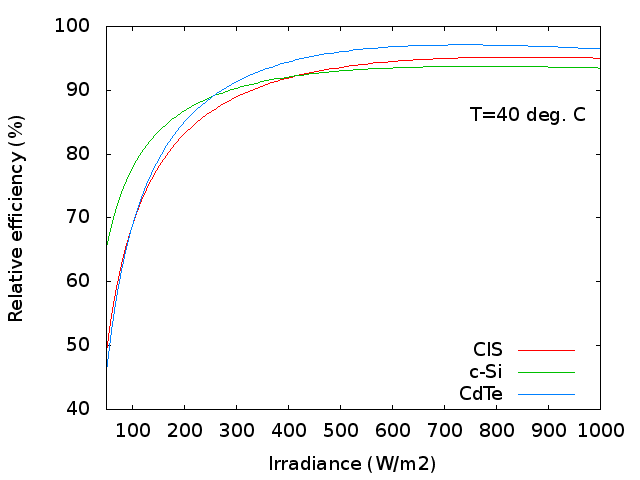

In [46]:
Image(filename='img/eff_rel_irr.png')

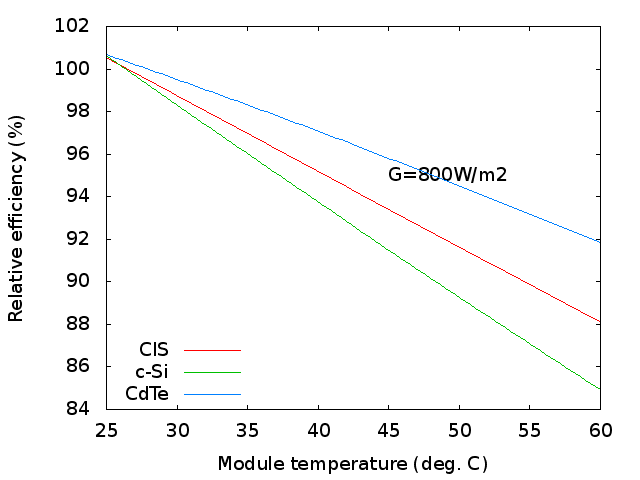

In [47]:
Image(filename='img/eff_rel_tem.png')

Dunque dobbiamo tenere in considerazione le reali condizioni di utilizzo del pannello. Utilizzando il modello descritto in (Huld et al. 2011) possiamo calcolare la potenza effettiva $P(G,T)$, ad una certa radiazione solare incidente $G$ e temperatura del modulo $T_m$, esprimendo l'efficienza dei moduli in funzione dell'efficienza relativa $\eta_{rel}(G',T')$ come segue:
$$\begin{align}
\eta(G,T) &= \frac{P(G,T)}{AG} = \eta_{STC}\eta_{rel}(G',T') \quad (1) \\
\text{dove:}& \\
G' &= \frac{G}{G_{STC}};\ T' = T_{m}-T_{STC} \\
\eta_{rel}(G',T') &= 1+k_1\ln(G')+k_2\ln(G')^2 +k_3T' +k_4T'\ln(G') +k_5T'ln(G')^2 +k_6T'^2 \\
\end{align}$$

Dunque, dall'Eq. (1) esplicitando la potenza effettiva $P(G,T)$ otteniamo:
$$\begin{align}
P(G,T) &= \eta_{STC}\eta_{rel}(G',T')AG = P_{STC}G' \eta_{rel}(G',T') \quad [kW] \\
\end{align}$$

I coefficienti $k$ sono riportati nella seguente tabella:

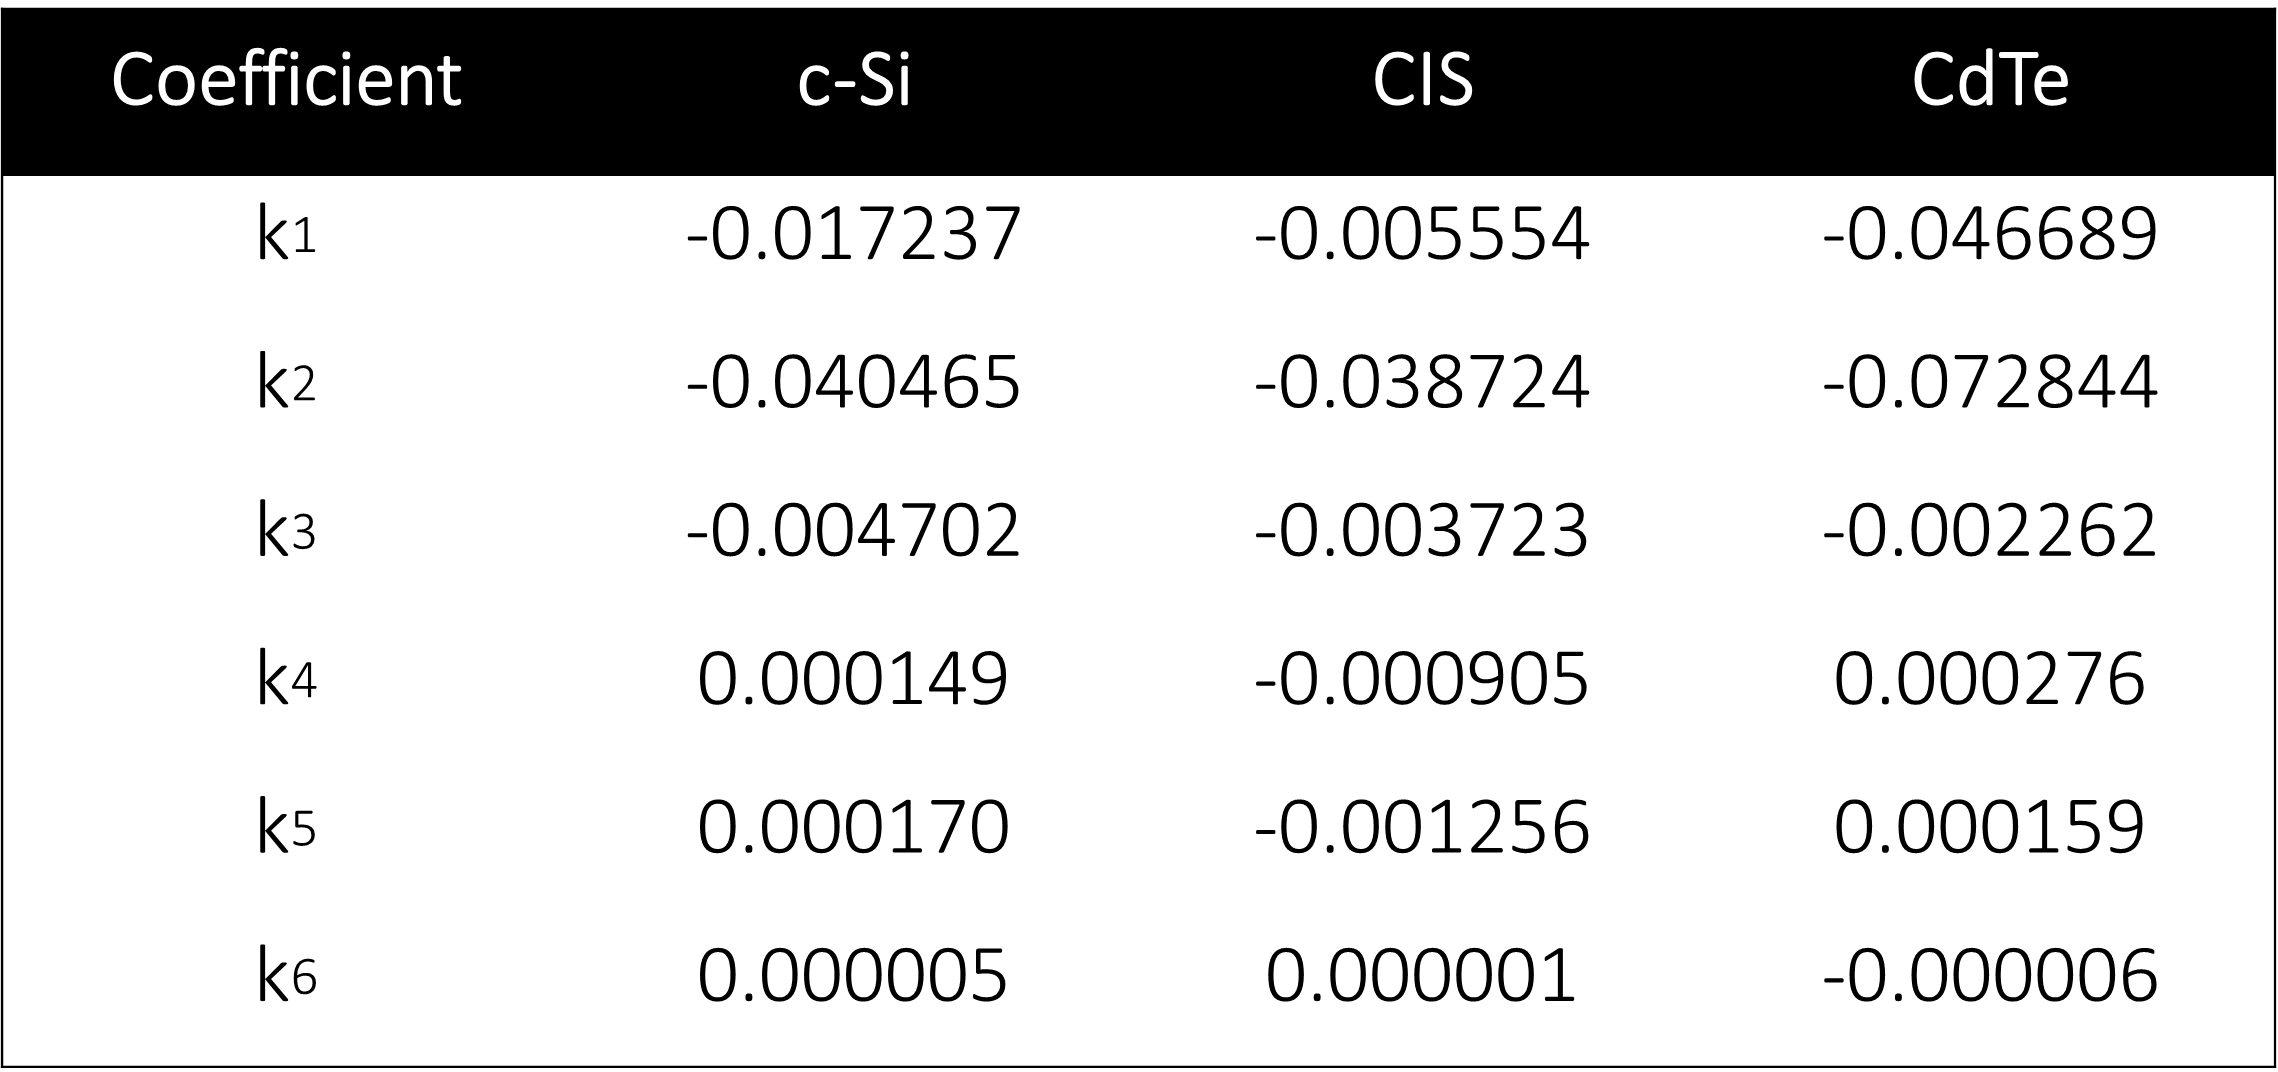

In [48]:
# Coefficienti per c-Si
k1 = -0.017237
k2 = -0.040465
k3 = -0.004702
k4 = 0.000149
k5 = 0.000170
k6 = 0.000005
Image(filename="img/k_eff_rel.png",width=500)

#### Temperatura del modulo
Quando la radiazione solare incide sui moduli fotovoltaici, la temperatura dei moduli salirà al di sopra della temperatura ambiente. Ciò significa che la temperatura del modulo dipende sia dalla temperatura dell'aria che dall'irradianza. Inoltre, se c'è vento può aiutare a raffreddare i moduli. Questi effetti possono essere calcolati utilizzando il modello in (Faiman, 2008) che calcola la $T_m$ come segue:
$$\begin{align}
T_m &=T_a +  \frac{G}{U_0+U_1 W} \quad [°C] \\
\end{align}$$
dove $W \ [m/s]$ è la velocità del vento, e i coefficienti $U$ (coefficienti di scambio termico) sono riportati nella seguente tabella:

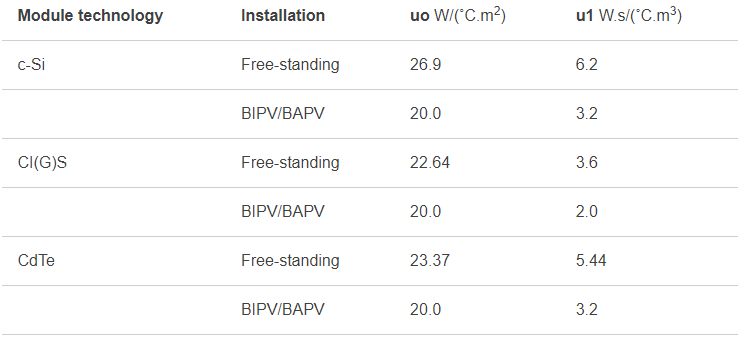

In [49]:
Image(filename="img/utemp_eff_rel.png",width=600)

#### Perdite di sistema
Tutti i calcoli sopra descritti forniranno alla fine la potenza FV che può essere erogata ai connettori del modulo (o array). Ma prima che l’energia arrivi alla rete, deve essere trasformata in corrente alternata dall’inverter, il che provoca un’altra perdita. Ci sono anche perdite nei cavi e perdite dovute a differenze di produzione dai moduli che non hanno tutti esattamente la stessa potenza. Possiamo assumere un valore del 14% per la "perdita di sistema", cioè considerare una efficienza dell'intero sistema (Balance of System) pari all'86%.  

In [50]:
eff_BOS = 0.86
Gn = G/G_STC

# Coefficienti per c-Si BIPV
U0 = 20.0
U1 = 3.2
Tm = T_a + G/(U0+U1*W)

Tn = Tm - T_STC

eff_rel = 1+k1*math.log(Gn)+k2*math.log(Gn)**2 +k3*Tn +k4*Tn*math.log(Gn) +k5*Tn*math.log(Gn)**2 +k6*Tn**2

P = P_STC*Gn*eff_rel*eff_BOS
Markdown(fr'In conclusione, svolgendo i calcoli otteniamo che la potenza effettiva del sistema fotovoltaico è $P = {round(P,2)} \ kW$.')

In conclusione, svolgendo i calcoli otteniamo che la potenza effettiva del sistema fotovoltaico è $P = 0.67 \ kW$.

In [51]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

# Esercizio 4

Laboratorio utilizzo PVGIS e Libreria Python pvlib

## Calcolo Produzione Fotovoltaica utilizzando PVGIS tramite la libreria pvlib
> pvlib python is a community developed toolbox that provides a set of functions and classes for simulating the performance of photovoltaic energy systems and accomplishing related tasks. The core mission of pvlib python is to provide open, reliable, interoperable, and benchmark implementations of PV system models.

> The source code for pvlib python is hosted on github. Please see the Installation page for installation help. 
For examples of how to use pvlib python, please see Package Overview and our Jupyter Notebook tutorials. The documentation assumes general familiarity with Python, NumPy, and Pandas. Google searches will yield many excellent tutorials for these packagen


[QUI documentazione pvlib](https://pvlib-python.readthedocs.io/en/stable/)

Per utilizzare PVGIS tramite la libreria pvlib possiamo sfruttare gli iotools implementati, in particolare la funzione *get_pvgis_hourly()*. Qui trovate la documentazione per l'utilizzo della funzione: [Doc get_pvgis_hourly()](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_hourly.html#pvlib.iotools.get_pvgis_hourly). Qui trovate le API per utilizzare PVGIS: [API PVGIS](https://joint-research-centre.ec.europa.eu/pvgis-photovoltaic-geographical-information-system/getting-started-pvgis/api-non-interactive-service_en)

In [52]:
help(pvgis.get_pvgis_hourly)

Help on function get_pvgis_hourly in module pvlib.iotools.pvgis:

get_pvgis_hourly(latitude, longitude, start=None, end=None, raddatabase=None, components=True, surface_tilt=0, surface_azimuth=180, outputformat='json', usehorizon=True, userhorizon=None, pvcalculation=False, peakpower=None, pvtechchoice='crystSi', mountingplace='free', loss=0, trackingtype=0, optimal_surface_tilt=False, optimalangles=False, url='https://re.jrc.ec.europa.eu/api/', map_variables=True, timeout=30)
    Get hourly solar irradiation and modeled PV power output from PVGIS.

    PVGIS data is freely available at [1]_.

    Parameters
    ----------
    latitude: float
        In decimal degrees, between -90 and 90, north is positive (ISO 19115)
    longitude: float
        In decimal degrees, between -180 and 180, east is positive (ISO 19115)
    start : int or datetime like, optional
        First year of the radiation time series. Defaults to first year
        available.
    end : int or datetime like, optio

Carichiamo un dataset di superfici disponibili per l'installazione di fotovoltaico sul tetto e visualizziamo i primi 5 records.

In [53]:
sunroofs = pd.read_csv("data/sunroofs.csv")
sunroofs.head()

fid  slope_clas  fid_2  aspect_cla  slope_mean      A_ava  cos_aspect  \
0   38           2     40           2   24.703038  45.422640   -0.901033   
1   43           1     38           1   14.860566  16.559988   -0.469826   
2  124           1    133           2    6.699572  15.864334   -0.894905   
3  253           1    359           2   18.113563  26.576778   -0.939839   
4  257           1    408           2   11.088444  22.681984   -0.860684   

   sin_aspect  aspect_mea  id     _mean    xcoord     ycoord  
0    0.400812  156.018792   1  0.900000  7.325949  45.753119  
1    0.868352  118.415796   2  0.750000  7.321544  45.753066  
2    0.119910  172.368265   3  1.000000  7.321129  45.752889  
3   -0.028429  181.732605   4  0.666667  7.325872  45.752751  
4    0.405279  154.785198   5  1.000000  7.326104  45.752737

Conosciamo la posizione della superficie del tetto (xcoord e ycoord), l'inclinazione (slope_mean), la direzione (aspect_mea) e la superficie disponibile (A_ava). Selezioniamo una di queste aree:

In [54]:
rooftop = sunroofs.loc[sunroofs.id==1203] # 1217 1203 1195 1103 
rooftop

fid  slope_clas  fid_2  aspect_cla  slope_mean       A_ava  \
1136  27850           2  42313           2   24.695791  100.474479   

      cos_aspect  sin_aspect  aspect_mea    id  _mean    xcoord     ycoord  
1136   -0.902483    0.056594  176.411731  1203    1.0  7.325246  45.736242

Dal dateset estraiamo le informazioni che ci servono per il calcolo:

In [55]:
L = rooftop.ycoord.values[0]
l_local = rooftop.xcoord.values[0] # west negative!
start = 2020 # last year available 2020
end = 2020
surface_tilt = rooftop.slope_mean.values[0]
surface_azimuth = rooftop.aspect_mea.values[0] # 0=south, west positive! 

Calcoliamo la potenza di picco installabile sulla superficie, ipotizzando che possiamo sfruttare tutta l'area ma considerando un coefficiente di ingompro del 10% (per tenere conto delle strutture di supporto dei pannelli fotovoltaici). Ipotizziamo anche un'efficienza dei pannelli del 23%.

In [56]:
#Peak Power is the power that the manufacturer declares that the PV array can produce under standard test conditions, 
#which are a constant 1000W of solar irradiance per square meter in the plane of the array, at an array temperature of 25°C. 
#The peak power should be entered in kilowatt-peak (kWp). 
#If you do not know the declared peak power of your modules but instead know the area of the modules (in m2) and the declared conversion efficiency (in percent), 
#you can calculate the peak power as power (kWp) = 1 kW/m2 * area * efficiency / 100. 
#peakpower = 1 
# or
area_ava = np.ceil(rooftop.A_ava.values[0]*0.90) # m2
module_eff = 23 # %
peakpower = area_ava*module_eff/100 # kW
Markdown(f'Potenza di picco installata: {peakpower} kW')

Potenza di picco installata: 20.93 kW

Adesso abbiamo tutti i dati necessari per utilizzare la funzione get_pvgis_hourly(). In particolare, ipotizziamo di installare dei pannelli di tipo c-Si e un'efficienza di sistema dell'86%.

In [57]:
res = pvgis.get_pvgis_hourly(latitude=L,
                             longitude=l_local,
                             start=start,
                             end=end,
                             raddatabase='PVGIS-SARAH3',
                             surface_tilt=surface_tilt,
                             surface_azimuth=surface_azimuth,
                             outputformat='csv',
                             pvcalculation=True,
                             usehorizon =True,
                             peakpower=peakpower,
                             pvtechchoice='crystSi',
                             loss=14,
                             url='https://re.jrc.ec.europa.eu/api/v5_3/',
                             map_variables = False)

Otteniamo una lista con 3 dizionari. In particolare, i principali parametri di input:

In [58]:
parameters = res[1]
parameters

{'latitude': 45.736,
 'longitude': 7.325,
 'elevation': 574.0,
 'radiation_database': 'PVGIS-SARAH3',
 'Slope': '25 deg.',
 'Azimuth': '-4 deg.',
 'Nominal power of the PV system (c-Si) (kWp)': '20.9',
 'System losses (%)': '14.0'}

la nota descrittiva delle colonne della timeseries:

In [59]:
nota = res[2]
nota

{'P': 'PV system power (W)',
 'Gb(i)': 'Beam (direct) irradiance on the inclined plane (plane of the array) (W/m2)',
 'Gd(i)': 'Diffuse irradiance on the inclined plane (plane of the array) (W/m2)',
 'Gr(i)': 'Reflected irradiance on the inclined plane (plane of the array) (W/m2)',
 'H_sun': 'Sun height (degree)',
 'T2m': '2-m air temperature (degree Celsius)',
 'WS10m': '10-m total wind speed (m/s)',
 'Int': '1 means solar radiation values are reconstructed'}

e la timeseries stessa con la potenza PV in ouput, le componenti della radiazione solare, l'altezza del sole, la temperatura dell'aria a 2 metri, il vento a 10 m ed un booleano Int che riporta se le componenti della radiazione sono ricostruite o misurate. Di seguito si riportano le prime 24 h dell'anno di riferimento scelto:

In [60]:
timeseries = res[0]
timeseries.head(24)

P   Gb(i)   Gd(i)  Gr(i)  H_sun   T2m  \
time                                                                      
2020-01-01 00:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -2.95   
2020-01-01 01:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -1.62   
2020-01-01 02:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -1.39   
2020-01-01 03:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -1.27   
2020-01-01 04:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -1.33   
2020-01-01 05:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -1.48   
2020-01-01 06:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -1.47   
2020-01-01 07:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -2.18   
2020-01-01 08:10:00+00:00    155.72    0.00   18.49   0.18   7.21 -1.80   
2020-01-01 09:10:00+00:00    280.04    0.00   26.81   0.27  13.93 -0.91   
2020-01-01 10:10:00+00:00    322.11    0.00   29.59   0.29  18.68  0.26   
2020-01-01 11:10:00+00:00  13082.92  663.82   78.35   3.48  21.05  1.25   
2020-01-01 12:10:00+00:00  11650.27  525.91  130.13   3.20  20.76  1.76   
2020-01-01 13:10:00+00:00   9790.43  419.48  128.01   2.63  17.84  1.77   
2020-01-01 14:10:00+00:00   1197.61    4.67   75.15   0.73  12.62  1.40   
2020-01-01 15:10:00+00:00    381.14    0.00   33.29   0.33   5.54  0.58   
2020-01-01 16:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -0.66   
2020-01-01 17:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -1.83   
2020-01-01 18:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -2.57   
2020-01-01 19:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -2.93   
2020-01-01 20:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -3.06   
2020-01-01 21:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -3.00   
2020-01-01 22:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -2.81   
2020-01-01 23:10:00+00:00      0.00    0.00    0.00   0.00   0.00 -2.70   

                           WS10m  Int  
time                                   
2020-01-01 00:10:00+00:00   0.41    0  
2020-01-01 01:10:00+00:00   0.55    0  
2020-01-01 02:10:00+00:00   0.55    0  
2020-01-01 03:10:00+00:00   0.55    0  
2020-01-01 04:10:00+00:00   0.55    0  
2020-01-01 05:10:00+00:00   0.55    0  
2020-01-01 06:10:00+00:00   0.55    0  
2020-01-01 07:10:00+00:00   0.55    0  
2020-01-01 08:10:00+00:00   0.48    0  
2020-01-01 09:10:00+00:00   0.41    0  
2020-01-01 10:10:00+00:00   0.28    0  
2020-01-01 11:10:00+00:00   0.21    0  
2020-01-01 12:10:00+00:00   0.21    0  
2020-01-01 13:10:00+00:00   0.14    0  
2020-01-01 14:10:00+00:00   0.21    0  
2020-01-01 15:10:00+00:00   0.28    0  
2020-01-01 16:10:00+00:00   0.41    0  
2020-01-01 17:10:00+00:00   0.48    0  
2020-01-01 18:10:00+00:00   0.55    0  
2020-01-01 19:10:00+00:00   0.55    0  
2020-01-01 20:10:00+00:00   0.48    0  
2020-01-01 21:10:00+00:00   0.41    0  
2020-01-01 22:10:00+00:00   0.41    0  
2020-01-01 23:10:00+00:00   0.34    0

proviamo a costruire un grafico che ci mostra la curva di potenza del PV in due giorni consecutivi:

Text(0, 0.5, 'PV system power (W)')

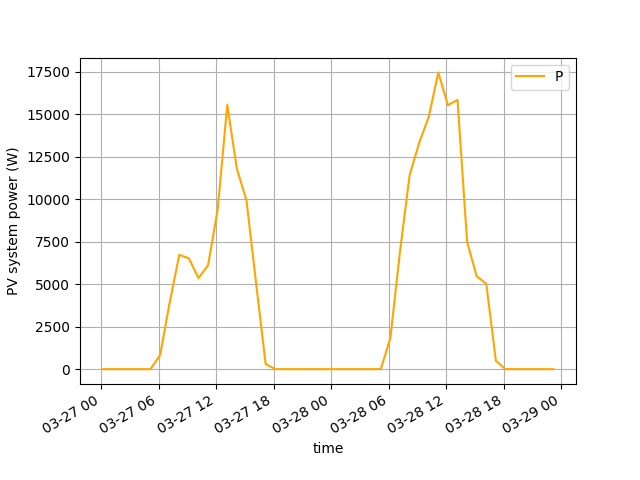

In [61]:
date = '2020-03-27'
date_end = '2020-03-28' #'2020-05-10'
plt.figure()
timeseries.loc[date:date_end].P.plot(legend='PV Power',c='orange');
plt.gca().grid('on')
plt.ylabel('PV system power (W)')

Possiamo anche visualizzare le componenti della radiazione solare:

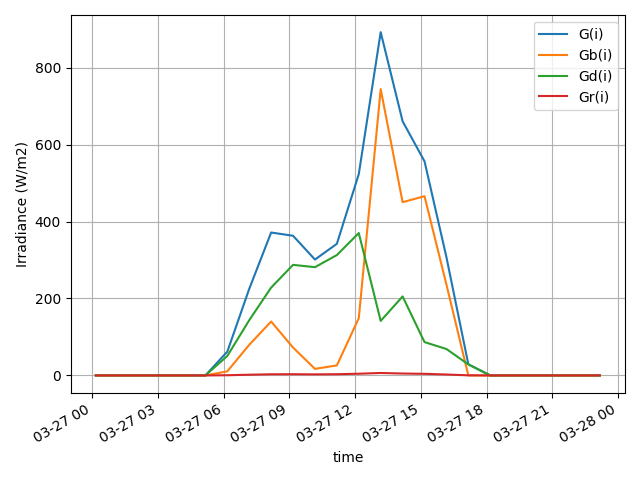

In [62]:
plt.figure()
timeseries['Heq'] = timeseries.P/peakpower
timeseries['G(i)'] = timeseries['Gb(i)'] + timeseries['Gd(i)'] + timeseries['Gr(i)'] # W/m2
#timeseries.loc[date:date_end]['Heq'].plot(legend='Heq')
timeseries.loc[date]['G(i)'].plot(legend='G(i)')
timeseries.loc[date]['Gb(i)'].plot(legend='Gb(i)')
timeseries.loc[date]['Gd(i)'].plot(legend='Gd(i)')
timeseries.loc[date]['Gr(i)'].plot(legend='Gr(i)')
plt.legend();
plt.gca().grid('on')
plt.ylabel('Irradiance (W/m2)')
plt.tight_layout()

proviamo a visualizzare il profilo giornaliero medio mensile di produzione fotovoltaica:

In [63]:
from matplotlib import colormaps

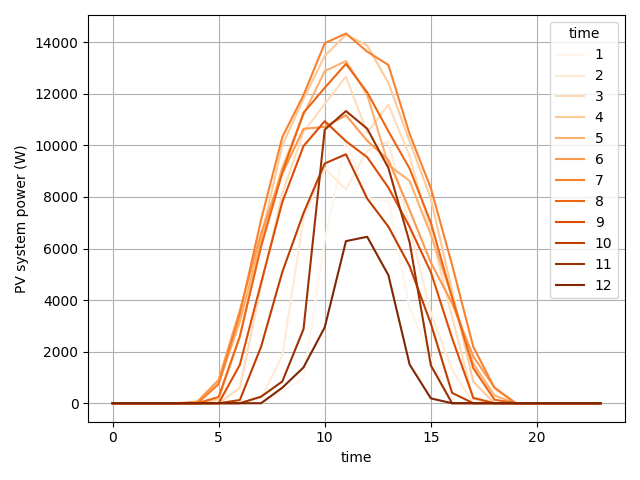

In [64]:
#plt.figure()
from matplotlib import colormaps
timeseries.groupby(by=[timeseries.index.hour,timeseries.index.month]).mean().unstack().P.plot(colormap=colormaps['Oranges']);
plt.gca().grid('on')
plt.ylabel('PV system power (W)')
plt.tight_layout()

Costruiamo un Carpet Plot per visualizzare a colpo d'occhio la produzione fotovoltaica durante tutto l'anno.

In [65]:
timeseries['DayOfYear'] = timeseries.index.dayofyear
timeseries['Hour'] = timeseries.index.hour 
timeseries['Month'] = timeseries.index.month
data_matrix = timeseries.pivot_table(index='DayOfYear',columns='Hour',values='P')

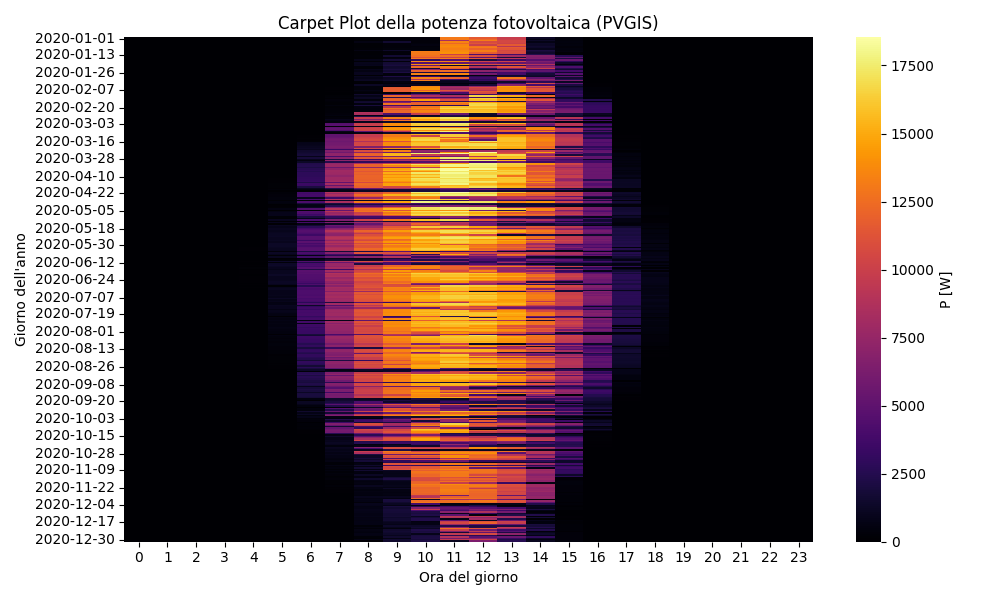

In [66]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(data_matrix,cmap='inferno',cbar_kws={'label':'P [W]'});
plt.xlabel('Ora del giorno')
plt.ylabel("Giorno dell'anno")
plt.title("Carpet Plot della potenza fotovoltaica (PVGIS)")
day_ticks = np.linspace(1,365,30,dtype=int)
timestamps = [timeseries[timeseries['DayOfYear'] == d].index.strftime('%Y-%m-%d')[0] for d in day_ticks]
plt.yticks(day_ticks,timestamps)
plt.tight_layout()

Proviamo adesso a ricavare delle statistiche descrittive del profilo di produzione su base giornaliera media mensile.

In [67]:
P_stats = timeseries.groupby(['Month', 'Hour'])['P'].describe().astype(float).reset_index()


In [80]:
P_stats

Month  Hour  count  mean  std  min  25%  50%  75%  max
0        1     0   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        1     1   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2        1     2   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        1     3   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4        1     4   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
..     ...   ...    ...   ...  ...  ...  ...  ...  ...  ...
283     12    19   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
284     12    20   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
285     12    21   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
286     12    22   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
287     12    23   31.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

[288 rows x 10 columns]

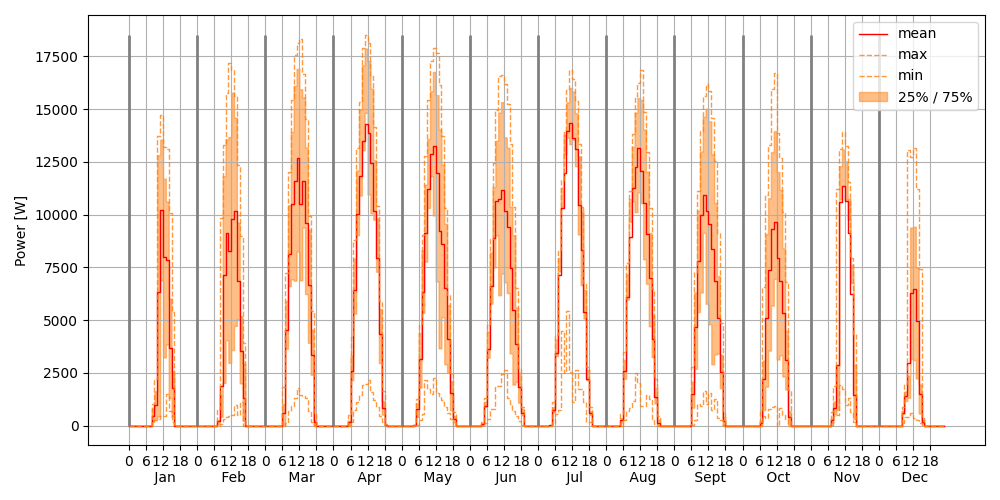

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
labels = list(np.tile(list(range(0,24)),12)[0:-1:6])
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
month = ['12 \n ' + s  for s in month]
idx_m = 0
for idx, val in enumerate(labels):
    if val == 12:
        labels[idx] = month[idx_m]
        idx_m += 1
aggr_daily_stats = P_stats
aggr_daily_stats['mean'].plot(ax=ax,color='red',linewidth=1,drawstyle="steps-post")
aggr_daily_stats['max'].plot(ax=ax,color='tab:orange',linewidth=1,linestyle='--',drawstyle="steps-post",alpha=0.8)
aggr_daily_stats['min'].plot(ax=ax,color='tab:orange',linewidth=1,linestyle='--',drawstyle="steps-post",alpha=0.8)
 
#P_stats.plot(ax=ax,alpha=0.1,color='tab:blue',drawstyle="steps-post",)
aggr_25 = aggr_daily_stats['25%']
agrr_75 = aggr_daily_stats['75%']
ax.fill_between(aggr_25.index, aggr_25, agrr_75, color='tab:orange', alpha=0.5, step='post',label='25% / 75%')
ymin = aggr_daily_stats['min'].min()
ymax = aggr_daily_stats['max'].max()
for i in range(0,12):
    ax.vlines(0 + 24 * i, ymin=ymin, ymax=ymax, color='grey', linewidth=2)
ax.set_xticks(ticks=P_stats.index.values[0:-1:6],labels=labels)
plt.xticks(rotation=0)
plt.ylabel('Power [W]')
plt.legend()
plt.grid('on')
plt.tight_layout()
plt.show()

Adesso calcoliamo la producibilità annua totale dell'impianto:

In [70]:
annual_production = timeseries.P.sum()/1000 # kWh
Markdown(f'Producibilità annua totale: {round(annual_production,0)} kWh')

Producibilità annua totale: 27867.0 kWh

Possimao infine calcolare le ore equivalenti dell'impianto PV:

In [71]:
annual_equivalent_hours = annual_production/peakpower # [kWh/kW] or [h]
Markdown(f'Ore equivalenti impianto PV: {round(annual_equivalent_hours,0)} h')

Ore equivalenti impianto PV: 1331.0 h

L'impianto PV è soggetto ad ombreggiamenti, sia di natura antropica (edifici vicini), sia di natura morfologica (montagne). Per tenere conto dell'ombra causata dalla morfologia dell'ambiente circostante si può utilizzare l'orizzonte, un dato che descrive, per ogni sezione circolare del piano orizzontale (ad esempio ogni 7.5 gradi) qual è l'altezza dell'ombra, dunque ricostruendo l'orizzonte visto dall'impianto PV.

In [72]:
from pvlib.iotools import get_pvgis_horizon

In [73]:
horizon = get_pvgis_horizon(L, l_local, url='https://re.jrc.ec.europa.eu/api/v5_3/')

In [74]:
horizon_azimuth = horizon[0]
horizon_azimuth.head(10)

horizon_azimuth
0.0      8.0
7.5     11.1
15.0    14.5
22.5    16.4
30.0    16.4
37.5    14.1
45.0    11.8
52.5    10.7
60.0    10.3
67.5     6.5
Name: horizon_elevation, dtype: float64

In [75]:
#pos = solarposition.get_solarposition(timeseries.index, L, l_local, method='ephemeris')
#ts = timeseries.join(pos)
#solpos = ts.loc[ts['elevation'] > 0, :]
#plt.figure()
#plt.scatter(np.radians(solpos.azimuth -180), solpos.zenith, s=2, label=None)


Infine, possiamo utilizzare le funzioni di pvlib per plottare la carta solare con le informazioni sull'orizzonte:

In [76]:
def plot_solar_chart(L=45,l_local=7.68,l_st=15, year=2024,month=3,day=27,hour=13,minute=0,col=0,horizon_azimuth=None):
    data = pd.to_datetime(datetime.datetime(year,month,day,hour,minute))
    n = data.dayofyear
    col = int(col)
    declination = solarposition.declination_cooper69(n) * 180 / np.pi # gradi, stessa formula usata a lezione
    time = data-pd.Timedelta(hours=col) # per correggere ora legale
    ETl = pd.to_timedelta(np.array(solarposition.equation_of_time_pvcdrom(n)), unit='minutes')
    solar_timel = time + ETl + pd.Timedelta(minutes=(l_st - l_local) * 4) # da verificare UTC

    pos = solarposition.get_solarposition(time, L, l_local, method='ephemeris')

    azimuthl = pos.azimuth.iloc[0]
    zenithl = pos.zenith.iloc[0]
    
    plt.close()
    fig2 = plt.figure(figsize=(10,6))
    fig2.canvas.header_visible = False
    ax2 = plt.subplot(1, 1, 1, projection='polar', label='pos')
    
    # cambio del riferimento della coordinata theta per il grafico
    corr = -180

    # remove nighttime
    # solpos = ts.loc[ts['elevation'] > 0, :]
    # points = ax2.scatter(np.radians(solpos.azimuth + corr), solpos.zenith, s=2, label=None,c=np.unique(solpos.P))
    # ax2.figure.colorbar(points, label = f'n = {n}')
    
    # Disengno sun path particolari (soltizi ed equinozi)
    color = {'2020-06-21':'tab:blue', '2020-03-20':'tab:orange', '2020-12-21':'tab:green',time.strftime('%Y-%m-%d'):'tab:red'}
    days = {'2020-06-21':23.45, '2020-03-20':0, '2020-12-21':-23.45,time.strftime('%Y-%m-%d'):round(declination,2)}
    for date in pd.to_datetime(list(days.keys())):
        times = pd.date_range(date, date + pd.Timedelta('24h'), freq='1min', tz='UTC')
        solpos = solarposition.get_solarposition(times, L, l_local)
        solpos = solpos.loc[solpos['elevation'] >= 0, :]
        label = date.strftime('%m-%d')
        d = date.strftime('%Y-%m-%d')
        ax2.plot(np.radians(solpos.azimuth + corr), solpos.zenith, label=label+rf' $\delta_s \simeq$ {days[d]}°',c=color[d])

    # ombra orizzonte
    if isinstance(horizon_azimuth, pd.Series):
        theta = horizon_azimuth.index/180*np.pi
        r = 90-horizon_azimuth.values
        
        # Interpolate the data for a smoother curve
        theta_interp = np.linspace(0, 2*np.pi, 1000)
        r_interp = np.interp(theta_interp, theta, r)
        ax2.plot(theta_interp,r_interp, color='grey', label='Horizon')
        # Fill the complementary area
        ax2.fill_between(theta_interp, r_interp, 90, color='lightgrey')
    
    ax2.figure.legend(loc='upper left')


    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
 

    ax2.set_title(f'Sun path diagram. LAT {L}° LON {l_local}°')
    
    # cambio coordinate
    theta_labels = list(np.linspace(0,180,18,endpoint=False,dtype='int'))+list(np.linspace(-180,0,18,endpoint=False,dtype='int'))
    theta_labels = [f'{str(elem)}°' for elem in theta_labels]
    ax2.set_theta_zero_location('S')
    ax2.set_theta_direction(-1)
    ax2.set_rmax(90)
    ax2.set_rlabel_position(140)
    ax2.set_thetagrids(np.linspace(0,360,36, endpoint=False),labels=theta_labels)
    ax2.figure.text(0.535, 0.025, '$a_s$', fontsize=12,
            verticalalignment='top')
    ax2.figure.text(0.42, 0.83, r'$\theta$', fontsize=12,
            verticalalignment='top')
    fig2.tight_layout()

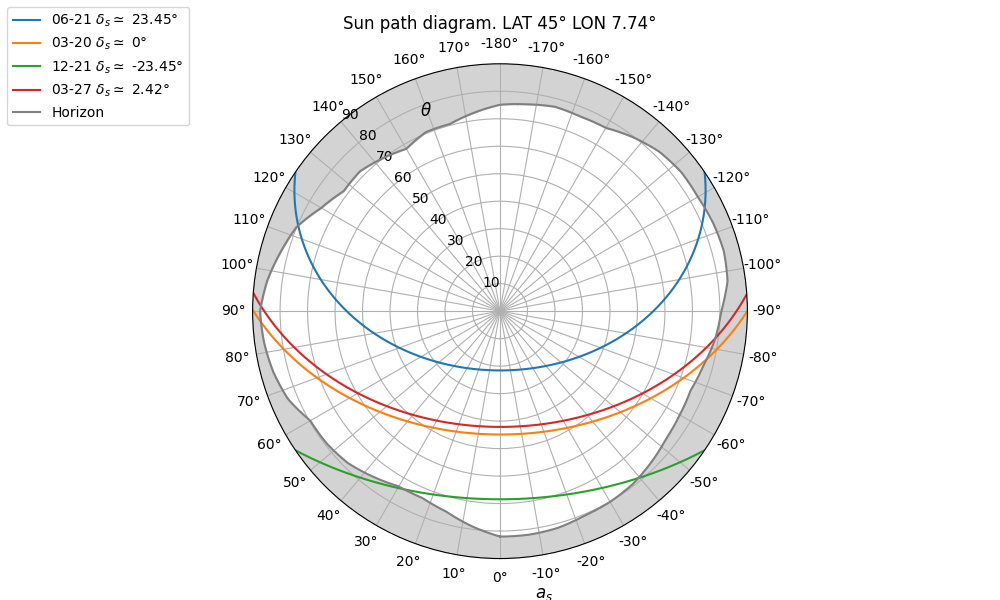

In [77]:
L = 45
l_local = 7.74
l_st = 15
year = 2024
month = 3
day = 27
hour = 13
minute = 0
col = 0
plot_solar_chart(L=L,l_local=l_local,year=year,month=month,day=day,hour=hour,minute=minute,col=col,horizon_azimuth=horizon_azimuth)

# Appendice

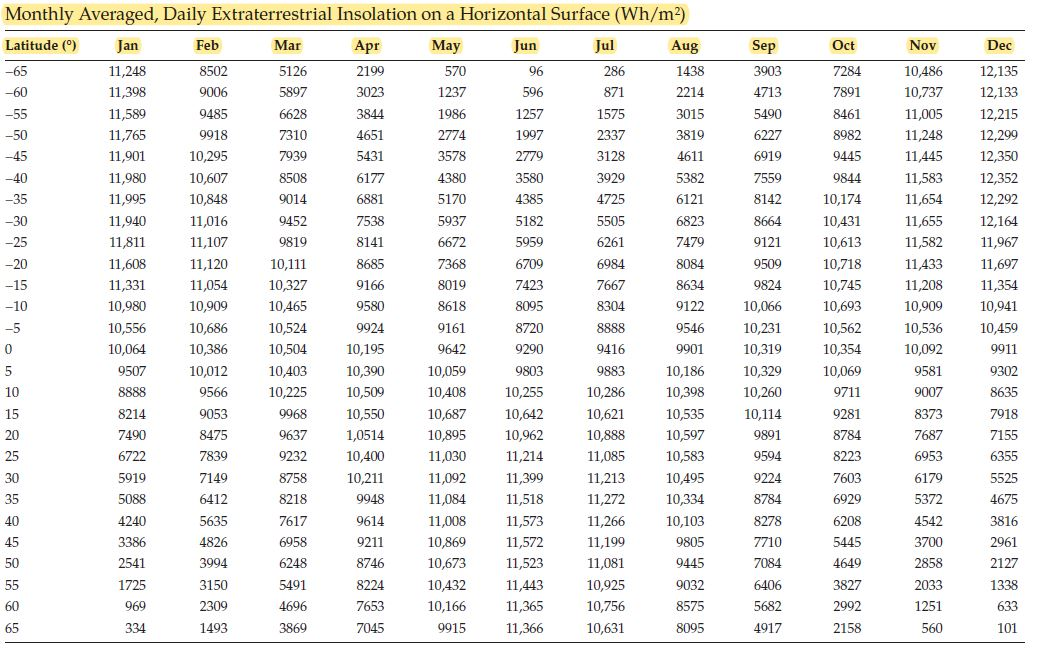

In [78]:
Image(filename="img/dati_Ho_h.JPG")

-------
Le versioni statiche ed aggiornate dei notebook le trovate online su [![GitHub](img/github.png)](https://github.com/DSSchiera/materials) (https://github.com/DSSchiera/materials). 

Le versioni interattive dei notebook le trovate su [![Binder](img/binder_logo.png)](https://mybinder.org/v2/gh/DSSchiera/materials/HEAD) (https://mybinder.org/v2/gh/DSSchiera/materials/HEAD).

In [79]:
sep = 'Rev.'
Markdown(f'Versione Documento: {__version__.split(sep)[1]}')

Versione Documento:  17/03/2025